In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from sklearn.preprocessing import normalize,StandardScaler,MinMaxScaler

In [3]:
from sklearn.cluster import  KMeans,MeanShift,DBSCAN,AgglomerativeClustering

In [4]:
from sklearn.metrics import silhouette_score

In [5]:
sc=StandardScaler()

In [6]:
path="D:\\project\\bank\\bank.xlsx"
bank=pd.read_excel(path,"Sheet1")

In [7]:
bank.head()

ردیف  تعداد حساب  مانده در تاریخ 31-6-98  ميانگين موجودي حساب ها  \
0     1         131            2.288625e+13          32287930648698   
1     2         100            7.469675e+12          10712686959195   
2     3         147            3.777900e+12           4583890140982   
3     4          60            5.754930e+12           4119524398300   
4     5           5            3.500148e+12           3509047948437   

   تعداد کل تراکنش هاي بدهکار  تعداد کل تراکنش هاي بستانکار  \
0                        1026                       27240.0   
1                         596                       15502.0   
2                          11                           1.0   
3                        1972                        4495.0   
4                          21                           0.0   

    تعداد کل تراکنش ها  ميانگين مبلغ هر تراکنش بدهکار  \
0                28266                   1.190447e+13   
1                16098                   5.414301e+12   
2                   12                   1.146621e+12   
3                 6467                   4.717916e+12   
4                   21                   2.674286e+10   

   ميانگين مبلغ هر تراکنش بستانکار  ميانگين فاصله بين روزهاي انجام تراکنش  \
0                     2.443093e+11                                  0.026   
1                     2.351825e+11                                  0.047   
2                     1.000000e+12                                 40.000   
3                     4.215901e+12                                  0.286   
4                              NaN                                 22.738   

   تعداد روز عدم فعالیت از آخرین تراکنش تا تاریخ روز  \
0                                                1.0   
1                                                1.0   
2                                                2.0   
3                                                0.0   
4                                                NaN   

   تعداد روز از افتتاح سپرده تا تاریخ آخرین تراکنش  
0                                           1502.0  
1                                           2433.0  
2                                            798.0  
3                                           3295.0  
4                                              NaN

In [8]:
bank.tail()

ردیف  تعداد حساب  مانده در تاریخ 31-6-98  ميانگين موجودي حساب ها  \
17850  17851           1              93939393.0                       0   
17851  17852           2               2835516.0                       0   
17852  17853           2              19449820.0                       0   
17853  17854           1              16830083.0                       0   
17854  17855           1               7353288.0                       0   

       تعداد کل تراکنش هاي بدهکار  تعداد کل تراکنش هاي بستانکار  \
17850                      500000                      500000.0   
17851                      590417                      590417.0   
17852                    21538390                    21365238.0   
17853                       33156                    10304458.0   
17854                      100000                      100000.0   

        تعداد کل تراکنش ها  ميانگين مبلغ هر تراکنش بدهکار  \
17850              1000000                            NaN   
17851              1180834                            NaN   
17852             42903628                            NaN   
17853             10337614                           82.0   
17854               200000                            NaN   

       ميانگين مبلغ هر تراکنش بستانکار  ميانگين فاصله بين روزهاي انجام تراکنش  \
17850                              NaN                                    NaN   
17851                              NaN                                    NaN   
17852                              NaN                                    NaN   
17853                              6.0                                    0.0   
17854                              NaN                                    NaN   

       تعداد روز عدم فعالیت از آخرین تراکنش تا تاریخ روز  \
17850                                                NaN   
17851                                                NaN   
17852                                                NaN   
17853                                                0.0   
17854                                                NaN   

       تعداد روز از افتتاح سپرده تا تاریخ آخرین تراکنش  
17850                                              NaN  
17851                                              NaN  
17852                                              NaN  
17853                                            5.977  
17854                                              NaN

##### change columns name to EN

In [9]:
bank.columns

Index(['ردیف', 'تعداد حساب', 'مانده در تاریخ 31-6-98',
       'ميانگين موجودي حساب ها', 'تعداد کل تراکنش هاي بدهکار',
       'تعداد کل تراکنش هاي بستانکار', ' تعداد کل تراکنش ها',
       'ميانگين مبلغ هر تراکنش بدهکار', 'ميانگين مبلغ هر تراکنش بستانکار',
       'ميانگين فاصله بين روزهاي انجام تراکنش',
       'تعداد روز عدم فعالیت از آخرین تراکنش تا تاریخ روز',
       'تعداد روز از افتتاح سپرده تا تاریخ آخرین تراکنش'],
      dtype='object')

In [10]:
"""
Number of days from the opening of the deposit until the date of the last transaction=NOF
Number of days of inactivity from the last transaction to the date of the day=NOITD
TN=Total number
"""

col=["index","Account number","Remaining on 31-6-98","Average account balance"
             ,"TN debtor transactions","TN creditor transactions"
             ,"TN transactions","average debtor transaction"
              ,"average creditor transaction","Average interval between transaction days"
              ,"NOITD",
               "NOF"   
    ]

In [11]:
bank.columns=col

In [12]:
bank.head()

index  Account number  Remaining on 31-6-98  Average account balance  \
0      1             131          2.288625e+13           32287930648698   
1      2             100          7.469675e+12           10712686959195   
2      3             147          3.777900e+12            4583890140982   
3      4              60          5.754930e+12            4119524398300   
4      5               5          3.500148e+12            3509047948437   

   TN debtor transactions  TN creditor transactions  TN transactions  \
0                    1026                   27240.0            28266   
1                     596                   15502.0            16098   
2                      11                       1.0               12   
3                    1972                    4495.0             6467   
4                      21                       0.0               21   

   average debtor transaction  average creditor transaction  \
0                1.190447e+13                  2.443093e+11   
1                5.414301e+12                  2.351825e+11   
2                1.146621e+12                  1.000000e+12   
3                4.717916e+12                  4.215901e+12   
4                2.674286e+10                           NaN   

   Average interval between transaction days  NOITD     NOF  
0                                      0.026    1.0  1502.0  
1                                      0.047    1.0  2433.0  
2                                     40.000    2.0   798.0  
3                                      0.286    0.0  3295.0  
4                                     22.738    NaN     NaN

In [13]:
bank.describe()

index  Account number  Remaining on 31-6-98  \
count  17855.000000    17855.000000          1.785500e+04   
mean    8928.000000        5.673425          7.653539e+09   
std     5154.438864       47.164267          2.067258e+11   
min        1.000000        1.000000          0.000000e+00   
25%     4464.500000        1.000000          7.733980e+05   
50%     8928.000000        1.000000          1.011544e+07   
75%    13391.500000        2.000000          2.064425e+08   
max    17855.000000     1809.000000          2.288625e+13   

       Average account balance  TN debtor transactions  \
count             1.785500e+04            1.785500e+04   
mean              7.651759e+09            1.752351e+05   
std               2.673377e+11            1.508950e+07   
min               0.000000e+00            0.000000e+00   
25%               3.580470e+06            2.000000e+00   
50%               3.666335e+07            9.000000e+00   
75%               3.360805e+08            4.500000e+01   
max               3.228793e+13            1.743975e+09   

       TN creditor transactions  TN transactions  average debtor transaction  \
count              1.785400e+04     1.785500e+04                1.728600e+04   
mean               1.170070e+05     2.922355e+05                3.395427e+09   
std                9.811179e+06     2.089358e+07                1.134848e+11   
min                0.000000e+00     0.000000e+00                0.000000e+00   
25%                1.000000e+00     3.000000e+00                3.137686e+06   
50%                6.000000e+00     1.700000e+01                5.300229e+07   
75%                3.800000e+01     1.020000e+02                2.956198e+08   
max                9.967912e+08     1.996791e+09                1.190447e+13   

       average creditor transaction  \
count                  1.420000e+04   
mean                   3.287951e+09   
std                    5.131152e+10   
min                    1.000000e+00   
25%                    1.670203e+07   
50%                    1.268619e+08   
75%                    6.274939e+08   
max                    4.215901e+12   

       Average interval between transaction days         NOITD           NOF  
count                               1.783900e+04  13413.000000  13411.000000  
mean                                2.422382e+04     37.701850   1369.600059  
std                                 2.598828e+06     60.629573   1128.992178  
min                                 0.000000e+00      0.000000      0.000000  
25%                                 6.607500e+00      1.000000    515.000000  
50%                                 2.800000e+01      7.000000   1043.000000  
75%                                 6.000000e+01     47.000000   2016.000000  
max                                 3.327867e+08    271.000000  10589.000000

In [14]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17855 entries, 0 to 17854
Data columns (total 12 columns):
index                                        17855 non-null int64
Account number                               17855 non-null int64
Remaining on 31-6-98                         17855 non-null float64
Average account balance                      17855 non-null int64
TN debtor transactions                       17855 non-null int64
TN creditor transactions                     17854 non-null float64
TN transactions                              17855 non-null int64
average debtor transaction                   17286 non-null float64
average creditor transaction                 14200 non-null float64
Average interval between transaction days    17839 non-null float64
NOITD                                        13413 non-null float64
NOF                                          13411 non-null float64
dtypes: float64(7), int64(5)
memory usage: 1.6 MB


##### drop useless columns

In [15]:
bank.drop("index",axis=1,inplace=True)

In [16]:
bank.NOF.nunique()

3671

In [17]:
bank.NOF.value_counts(dropna=False,normalize=True).head()
#24% nan value

NaN       0.248894
1066.0    0.001568
1065.0    0.001120
423.0     0.001120
427.0     0.001064
Name: NOF, dtype: float64

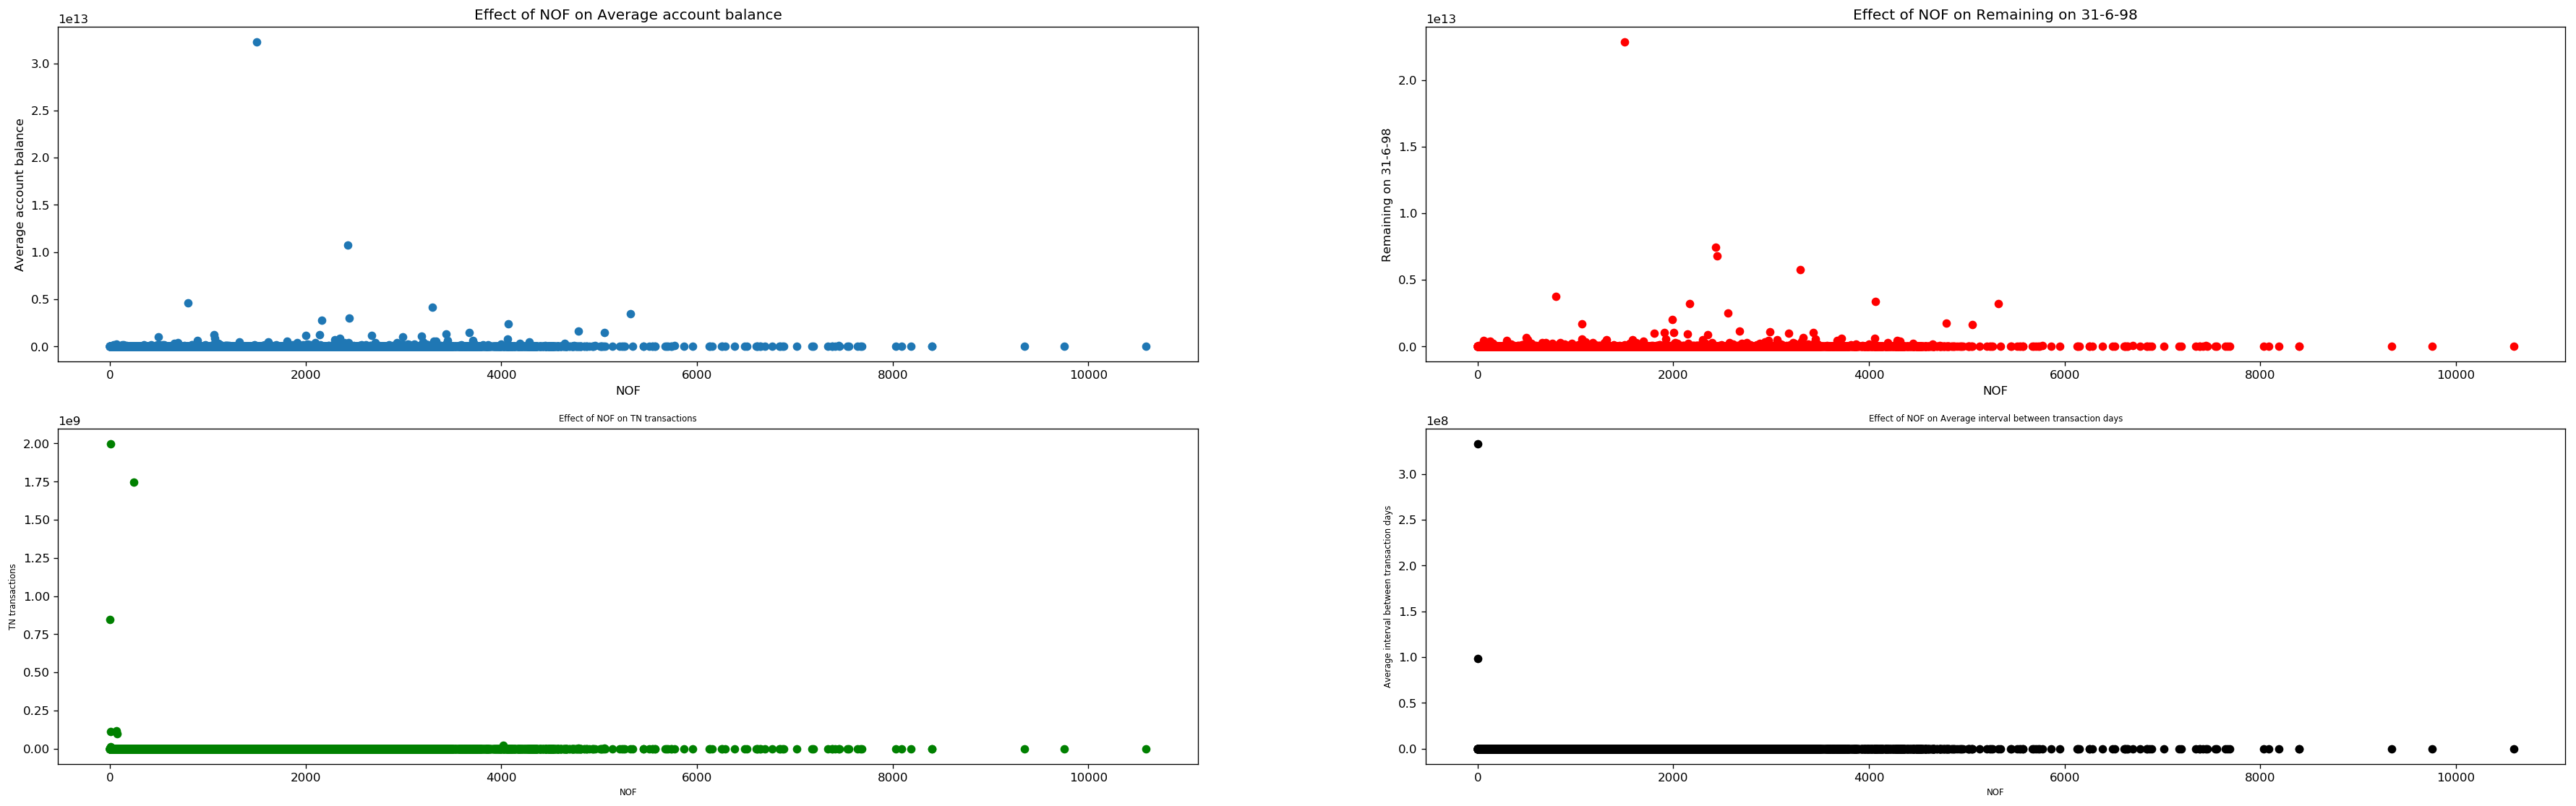

In [18]:
plt.figure(figsize=(17,5),dpi=120)

plt.subplot(221)
plt.scatter(bank.NOF,bank["Average account balance"])
plt.xlabel("NOF")
plt.ylabel("Average account balance")
plt.title("Effect of NOF on Average account balance")

plt.subplot(222)
plt.scatter(bank.NOF,bank["Remaining on 31-6-98"],color="r")
plt.xlabel("NOF")
plt.ylabel("Remaining on 31-6-98")
plt.title("Effect of NOF on Remaining on 31-6-98")

plt.subplot(223)
plt.scatter(bank.NOF,bank["TN transactions"],color="g")
plt.xlabel("NOF",fontsize=7)
plt.ylabel("TN transactions",fontsize=7)
plt.title("Effect of NOF on TN transactions",fontsize=7)

plt.subplot(224)
plt.scatter(bank.NOF,bank["Average interval between transaction days"],color="black")
plt.xlabel("NOF",fontsize=7)
plt.ylabel("Average interval between transaction days",fontsize=7)
plt.title("Effect of NOF on Average interval between transaction days",fontsize=7)

plt.subplots_adjust(3,3,4.7,4.7)


In [19]:
##  NOF tasir khasi roye hich kdom nadare  & feature mofidi nist aslan
bank.drop("NOF",axis=1,inplace=True)

In [20]:
bank.NOITD.value_counts(dropna=False,normalize=True)
#24% nan values

NaN        0.248782
1.000      0.147242
0.000      0.074153
2.000      0.061999
3.000      0.040885
             ...   
90.000     0.000056
237.000    0.000056
76.000     0.000056
134.000    0.000056
1.909      0.000056
Name: NOITD, Length: 245, dtype: float64

In [21]:
bank["NOITD"].agg({"min","mean","max"})

max     271.00000
min       0.00000
mean     37.70185
Name: NOITD, dtype: float64

([<matplotlib.axis.XTick at 0xdaf87d0>,
 <a list of 3 Text xticklabel objects>)

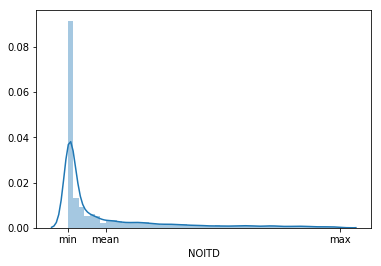

In [22]:
sb.distplot(bank["NOITD"])
plt.xticks([0,37.7,271],["min","mean","max"])

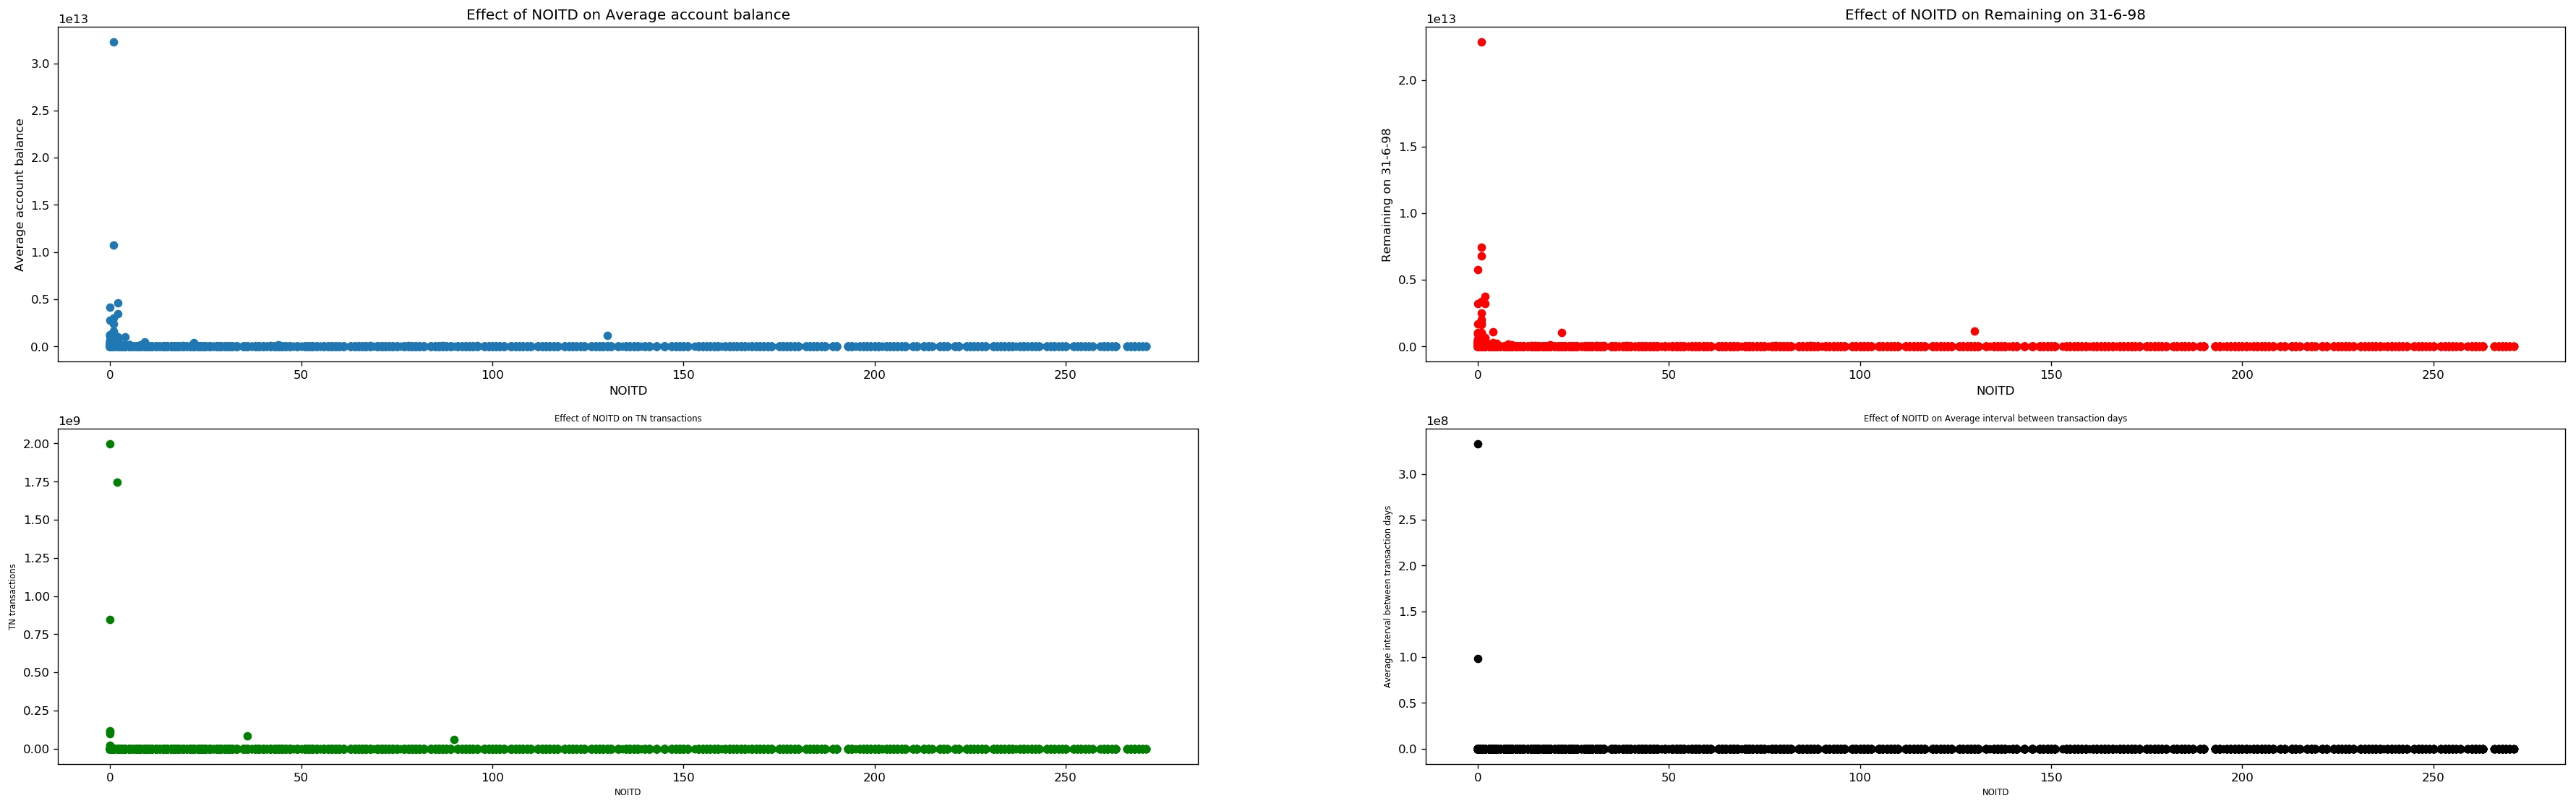

In [23]:
plt.figure(figsize=(17,5),dpi=120)

plt.subplot(221)
plt.scatter(bank.NOITD,bank["Average account balance"])
plt.xlabel("NOITD")
plt.ylabel("Average account balance")
plt.title("Effect of NOITD on Average account balance")

plt.subplot(222)
plt.scatter(bank.NOITD,bank["Remaining on 31-6-98"],color="r")
plt.xlabel("NOITD")
plt.ylabel("Remaining on 31-6-98")
plt.title("Effect of NOITD on Remaining on 31-6-98")

plt.subplot(223)
plt.scatter(bank.NOITD,bank["TN transactions"],color="g")
plt.xlabel("NOITD",fontsize=7)
plt.ylabel("TN transactions",fontsize=7)
plt.title("Effect of NOITD on TN transactions",fontsize=7)

plt.subplot(224)
plt.scatter(bank.NOITD,bank["Average interval between transaction days"],color="black")
plt.xlabel("NOITD",fontsize=7)
plt.ylabel("Average interval between transaction days",fontsize=7)
plt.title("Effect of NOITD on Average interval between transaction days",fontsize=7)

plt.subplots_adjust(3,3,4.7,4.7)


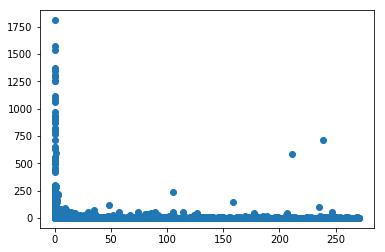

In [24]:
plt.scatter(bank["NOITD"],bank['Account number'])

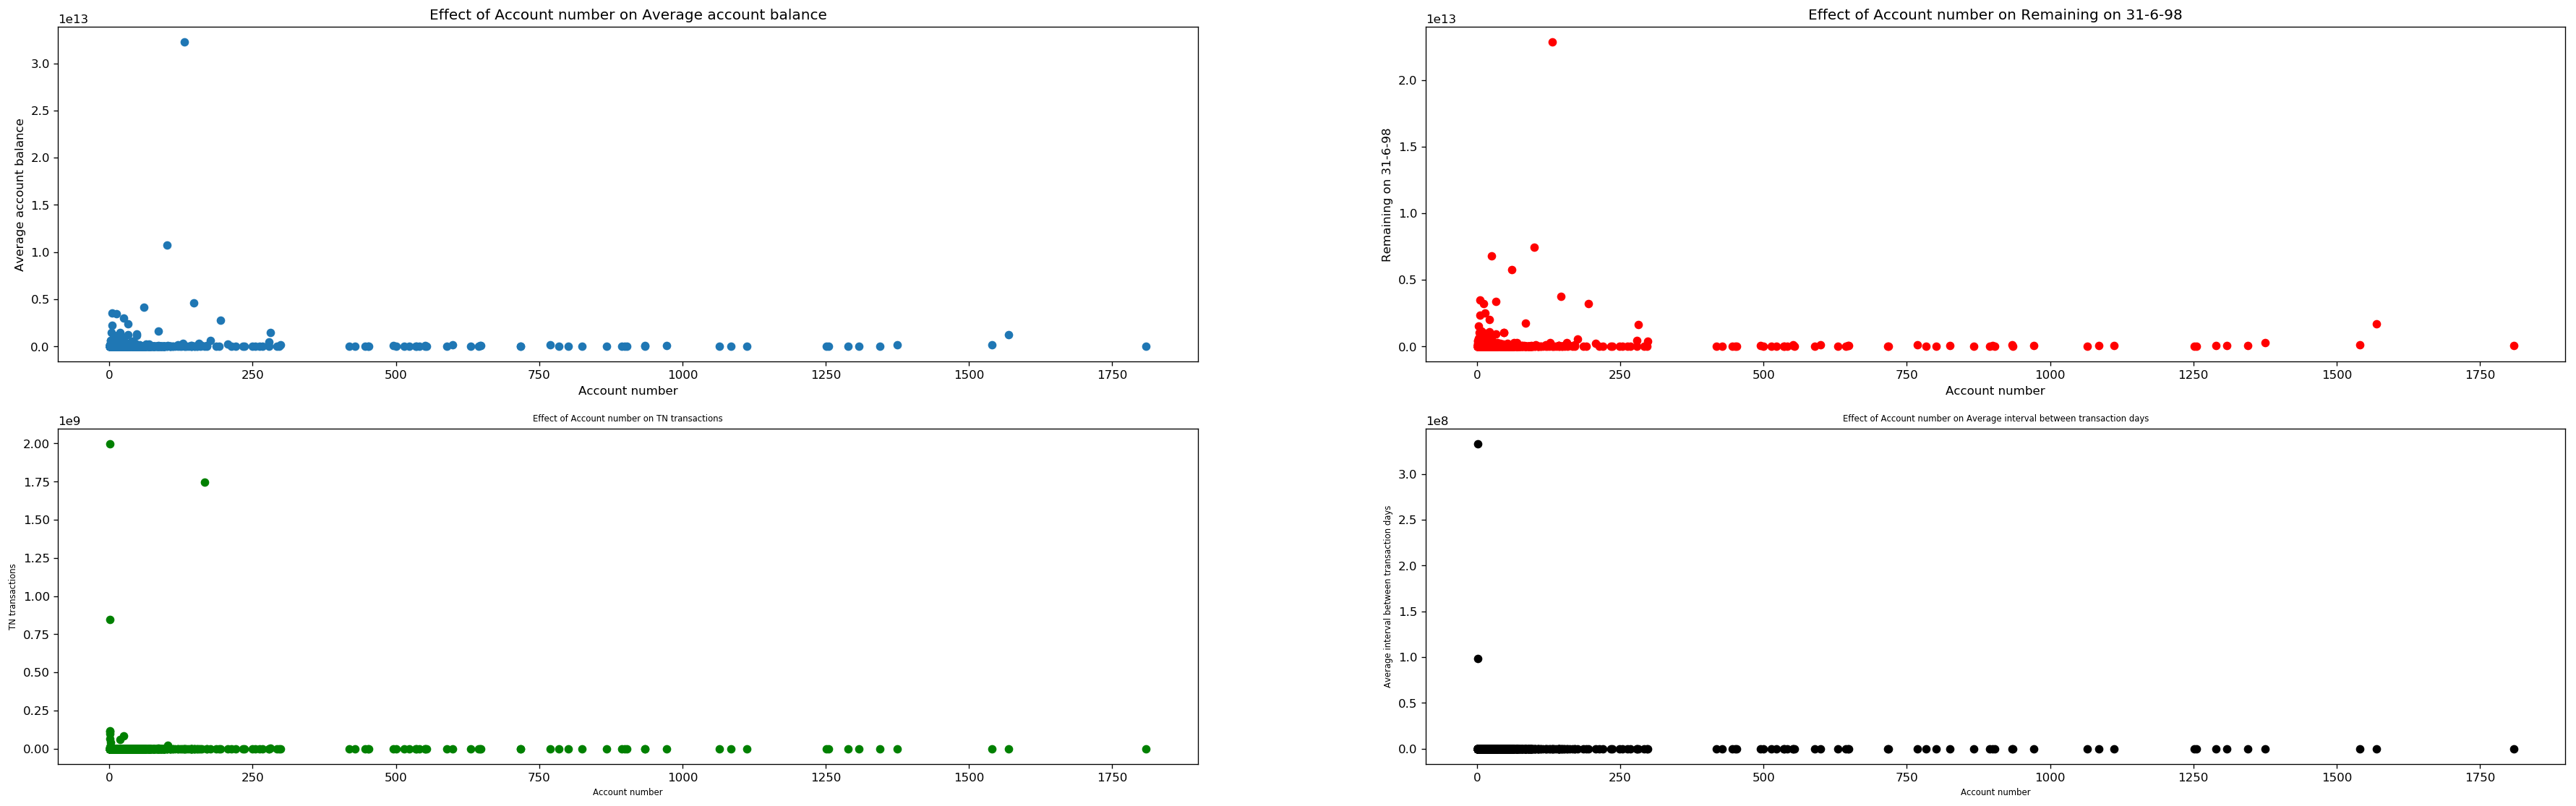

In [25]:
plt.figure(figsize=(17,5),dpi=120)

plt.subplot(221)
plt.scatter(bank["Account number"],bank["Average account balance"])
plt.xlabel("Account number")
plt.ylabel("Average account balance")
plt.title("Effect of Account number on Average account balance")

plt.subplot(222)
plt.scatter(bank["Account number"],bank["Remaining on 31-6-98"],color="r")
plt.xlabel("Account number")
plt.ylabel("Remaining on 31-6-98")
plt.title("Effect of Account number on Remaining on 31-6-98")

plt.subplot(223)
plt.scatter(bank["Account number"],bank["TN transactions"],color="g")
plt.xlabel("Account number",fontsize=7)
plt.ylabel("TN transactions",fontsize=7)
plt.title("Effect of Account number on TN transactions",fontsize=7)

plt.subplot(224)
plt.scatter(bank["Account number"],bank["Average interval between transaction days"],color="black")
plt.xlabel("Account number",fontsize=7)
plt.ylabel("Average interval between transaction days",fontsize=7)
plt.title("Effect of Account number on Average interval between transaction days",fontsize=7)

plt.subplots_adjust(3,3,4.7,4.7)


In [26]:
bank["Average interval between transaction days"].agg({"min","max","mean"})


max     3.327867e+08
min     0.000000e+00
mean    2.422382e+04
Name: Average interval between transaction days, dtype: float64

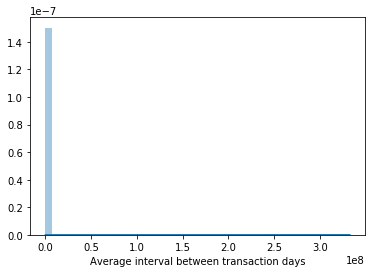

In [27]:
sb.distplot(bank["Average interval between transaction days"])

Text(0.5, 1.0, 'counts of Account number values')

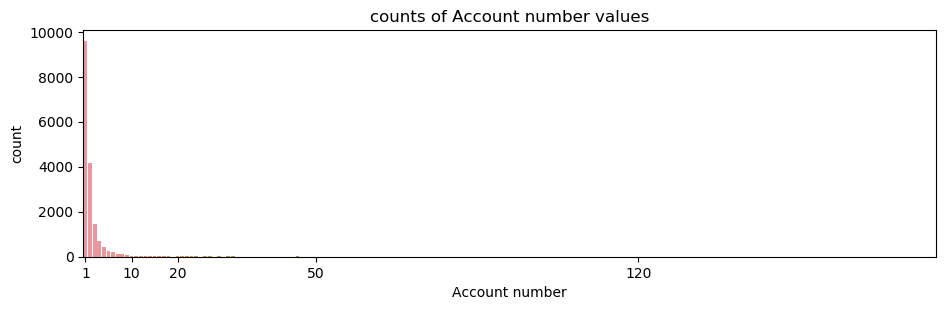

In [28]:
plt.figure(figsize=(11,3),dpi=100)
sb.countplot("Account number",data=bank)
plt.xticks([0,10,20,50,120],[1,10,20,50,120])
plt.title("counts of Account number values")

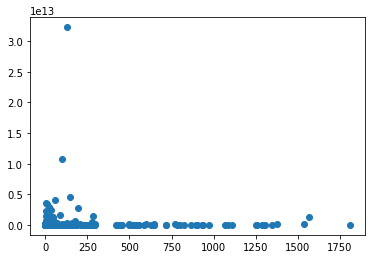

In [29]:
plt.scatter(bank["Account number"],bank["Average account balance"])

In [30]:
bank.drop(["Average interval between transaction days", 'NOITD',"Account number"],axis=1,inplace=True)

In [31]:
bank.head()

Remaining on 31-6-98  Average account balance  TN debtor transactions  \
0          2.288625e+13           32287930648698                    1026   
1          7.469675e+12           10712686959195                     596   
2          3.777900e+12            4583890140982                      11   
3          5.754930e+12            4119524398300                    1972   
4          3.500148e+12            3509047948437                      21   

   TN creditor transactions  TN transactions  average debtor transaction  \
0                   27240.0            28266                1.190447e+13   
1                   15502.0            16098                5.414301e+12   
2                       1.0               12                1.146621e+12   
3                    4495.0             6467                4.717916e+12   
4                       0.0               21                2.674286e+10   

   average creditor transaction  
0                  2.443093e+11  
1                  2.351825e+11  
2                  1.000000e+12  
3                  4.215901e+12  
4                           NaN

In [32]:
bank["Remaining on 31-6-98"].value_counts().head()

0.0         1018
1.0          133
500000.0      62
50000.0       58
100000.0      35
Name: Remaining on 31-6-98, dtype: int64

In [33]:
bank["Remaining on 31-6-98"].agg({"std","min","max","mean"})

max     2.288625e+13
min     0.000000e+00
std     2.067258e+11
mean    7.653539e+09
Name: Remaining on 31-6-98, dtype: float64

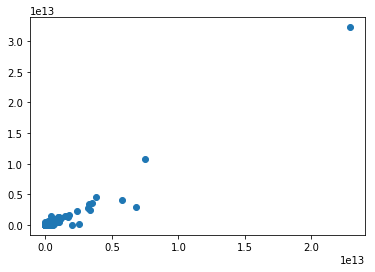

In [34]:
plt.scatter(bank["Remaining on 31-6-98"],bank["Average account balance"])

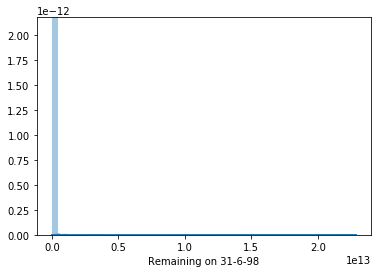

In [35]:
sb.distplot(bank["Remaining on 31-6-98"])

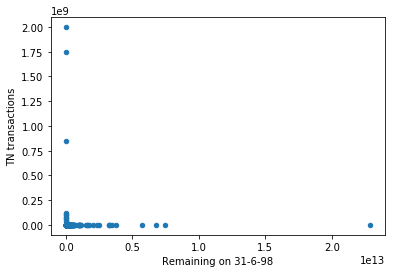

In [36]:
bank.plot("Remaining on 31-6-98","TN transactions",kind="scatter")

In [37]:
bank.drop("Remaining on 31-6-98",axis=1,inplace=True)

In [38]:
bank.head()

Average account balance  TN debtor transactions  TN creditor transactions  \
0           32287930648698                    1026                   27240.0   
1           10712686959195                     596                   15502.0   
2            4583890140982                      11                       1.0   
3            4119524398300                    1972                    4495.0   
4            3509047948437                      21                       0.0   

   TN transactions  average debtor transaction  average creditor transaction  
0            28266                1.190447e+13                  2.443093e+11  
1            16098                5.414301e+12                  2.351825e+11  
2               12                1.146621e+12                  1.000000e+12  
3             6467                4.717916e+12                  4.215901e+12  
4               21                2.674286e+10                           NaN

In [39]:
bank.corr()

Average account balance  TN debtor transactions  \
Average account balance                      1.000000               -0.000262   
TN debtor transactions                      -0.000262                1.000000   
TN creditor transactions                    -0.000136                0.380281   
TN transactions                             -0.000253                0.900774   
average debtor transaction                   0.923314               -0.000340   
average creditor transaction                 0.233029               -0.000554   

                              TN creditor transactions  TN transactions  \
Average account balance                      -0.000136        -0.000253   
TN debtor transactions                        0.380281         0.900774   
TN creditor transactions                      1.000000         0.744207   
TN transactions                               0.744207         1.000000   
average debtor transaction                   -0.000237        -0.000357   
average creditor transaction                 -0.000630        -0.000696   

                              average debtor transaction  \
Average account balance                         0.923314   
TN debtor transactions                         -0.000340   
TN creditor transactions                       -0.000237   
TN transactions                                -0.000357   
average debtor transaction                      1.000000   
average creditor transaction                    0.486595   

                              average creditor transaction  
Average account balance                           0.233029  
TN debtor transactions                           -0.000554  
TN creditor transactions                         -0.000630  
TN transactions                                  -0.000696  
average debtor transaction                        0.486595  
average creditor transaction                      1.000000

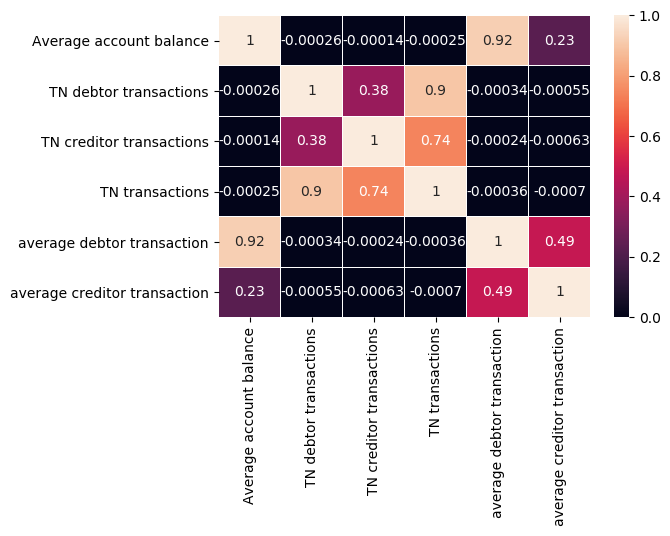

In [40]:
plt.figure(dpi=100)
sb.heatmap(bank.corr(),annot=True,lw=0.1)

In [41]:
bank.isna().sum()

Average account balance            0
TN debtor transactions             0
TN creditor transactions           1
TN transactions                    0
average debtor transaction       569
average creditor transaction    3655
dtype: int64

In [42]:
bank[bank["TN creditor transactions"].isna()]

Average account balance  TN debtor transactions  \
17815                        1                       1   

       TN creditor transactions  TN transactions  average debtor transaction  \
17815                       NaN                1                         NaN   

       average creditor transaction  
17815                           NaN

In [43]:
bank.loc[17815]

Average account balance         1.0
TN debtor transactions          1.0
TN creditor transactions        NaN
TN transactions                 1.0
average debtor transaction      NaN
average creditor transaction    NaN
Name: 17815, dtype: float64

In [44]:
bank.drop([17815],inplace=True)

In [45]:
bank.reset_index(drop=True,inplace=True)

In [46]:
bank.shape

(17854, 6)

In [47]:
bank[bank["TN debtor transactions"]==0]

Average account balance  TN debtor transactions  \
108               122993332209                       0   
444                20224859514                       0   
732                 9697862210                       0   
739                 9525431081                       0   
831                 7859830861                       0   
...                        ...                     ...   
17774                      100                       0   
17775                      100                       0   
17783                        3                       0   
17801                        1                       0   
17847                        0                       0   

       TN creditor transactions  TN transactions  average debtor transaction  \
108                         8.0                8                         NaN   
444                      6849.0             6849                         NaN   
732                         3.0                3                         NaN   
739                        14.0               14                         NaN   
831                         2.0                2                         NaN   
...                         ...              ...                         ...   
17774                       0.0                0                         0.0   
17775                       0.0                0                         0.0   
17783                       1.0                1                         NaN   
17801                       1.0                1                         NaN   
17847                  188620.0           188620                       204.0   

       average creditor transaction  
108                    6.116845e+11  
444                    1.849033e+06  
732                    3.333230e+09  
739                    1.056783e+08  
831                    1.105000e+10  
...                             ...  
17774                           NaN  
17775                           NaN  
17783                  1.000000e+00  
17801                  1.000000e+00  
17847                  2.000000e+02  

[569 rows x 6 columns]

In [48]:
bank[bank["TN debtor transactions"]==0]["average debtor transaction"].isna().sum()

561

In [49]:
bank["average debtor transaction"].isna().sum()

568

###### dorp na in axis=0 in rows

In [50]:
bank.dropna(axis=0,inplace=True)

In [51]:
bank.isna().sum()

Average account balance         0
TN debtor transactions          0
TN creditor transactions        0
TN transactions                 0
average debtor transaction      0
average creditor transaction    0
dtype: int64

In [52]:
bank.head()

Average account balance  TN debtor transactions  TN creditor transactions  \
0           32287930648698                    1026                   27240.0   
1           10712686959195                     596                   15502.0   
2            4583890140982                      11                       1.0   
3            4119524398300                    1972                    4495.0   
5            3433340538677                      17                      60.0   

   TN transactions  average debtor transaction  average creditor transaction  
0            28266                1.190447e+13                  2.443093e+11  
1            16098                5.414301e+12                  2.351825e+11  
2               12                1.146621e+12                  1.000000e+12  
3             6467                4.717916e+12                  4.215901e+12  
5               77                2.633333e+12                  1.071850e+12

###### creat columns == difference between the number of debtors and creditors  AND  difference between the average of debtors and creditors

In [53]:
bank["DBNCD"]=bank["TN creditor transactions"]-bank["TN debtor transactions"]

In [54]:
bank["DFACD"]=bank["average creditor transaction"]-bank["average debtor transaction"]

In [55]:
bank.head()


Average account balance  TN debtor transactions  TN creditor transactions  \
0           32287930648698                    1026                   27240.0   
1           10712686959195                     596                   15502.0   
2            4583890140982                      11                       1.0   
3            4119524398300                    1972                    4495.0   
5            3433340538677                      17                      60.0   

   TN transactions  average debtor transaction  average creditor transaction  \
0            28266                1.190447e+13                  2.443093e+11   
1            16098                5.414301e+12                  2.351825e+11   
2               12                1.146621e+12                  1.000000e+12   
3             6467                4.717916e+12                  4.215901e+12   
5               77                2.633333e+12                  1.071850e+12   

     DBNCD         DFACD  
0  26214.0 -1.166016e+13  
1  14906.0 -5.179119e+12  
2    -10.0 -1.466212e+11  
3   2523.0 -5.020147e+11  
5     43.0 -1.561483e+12

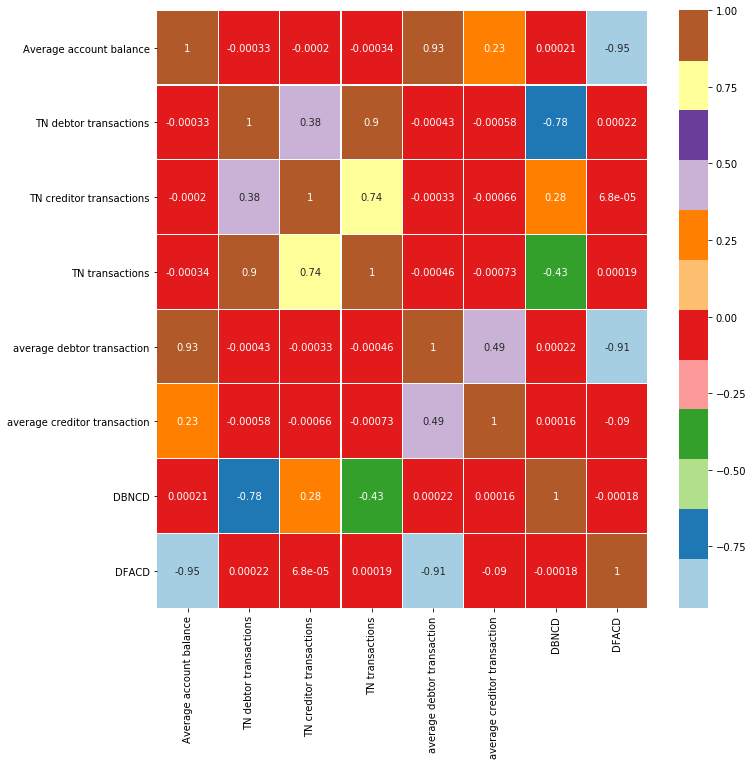

In [56]:
plt.figure(figsize=(11,11))
sb.heatmap(bank.corr(),annot=True,lw=0.1,cmap="Paired")

##### change type all columns to int64

In [57]:
#values to int64
for i in bank.columns:
    bank[i]=bank[i].astype(np.int64)

<Figure size 600x400 with 0 Axes>

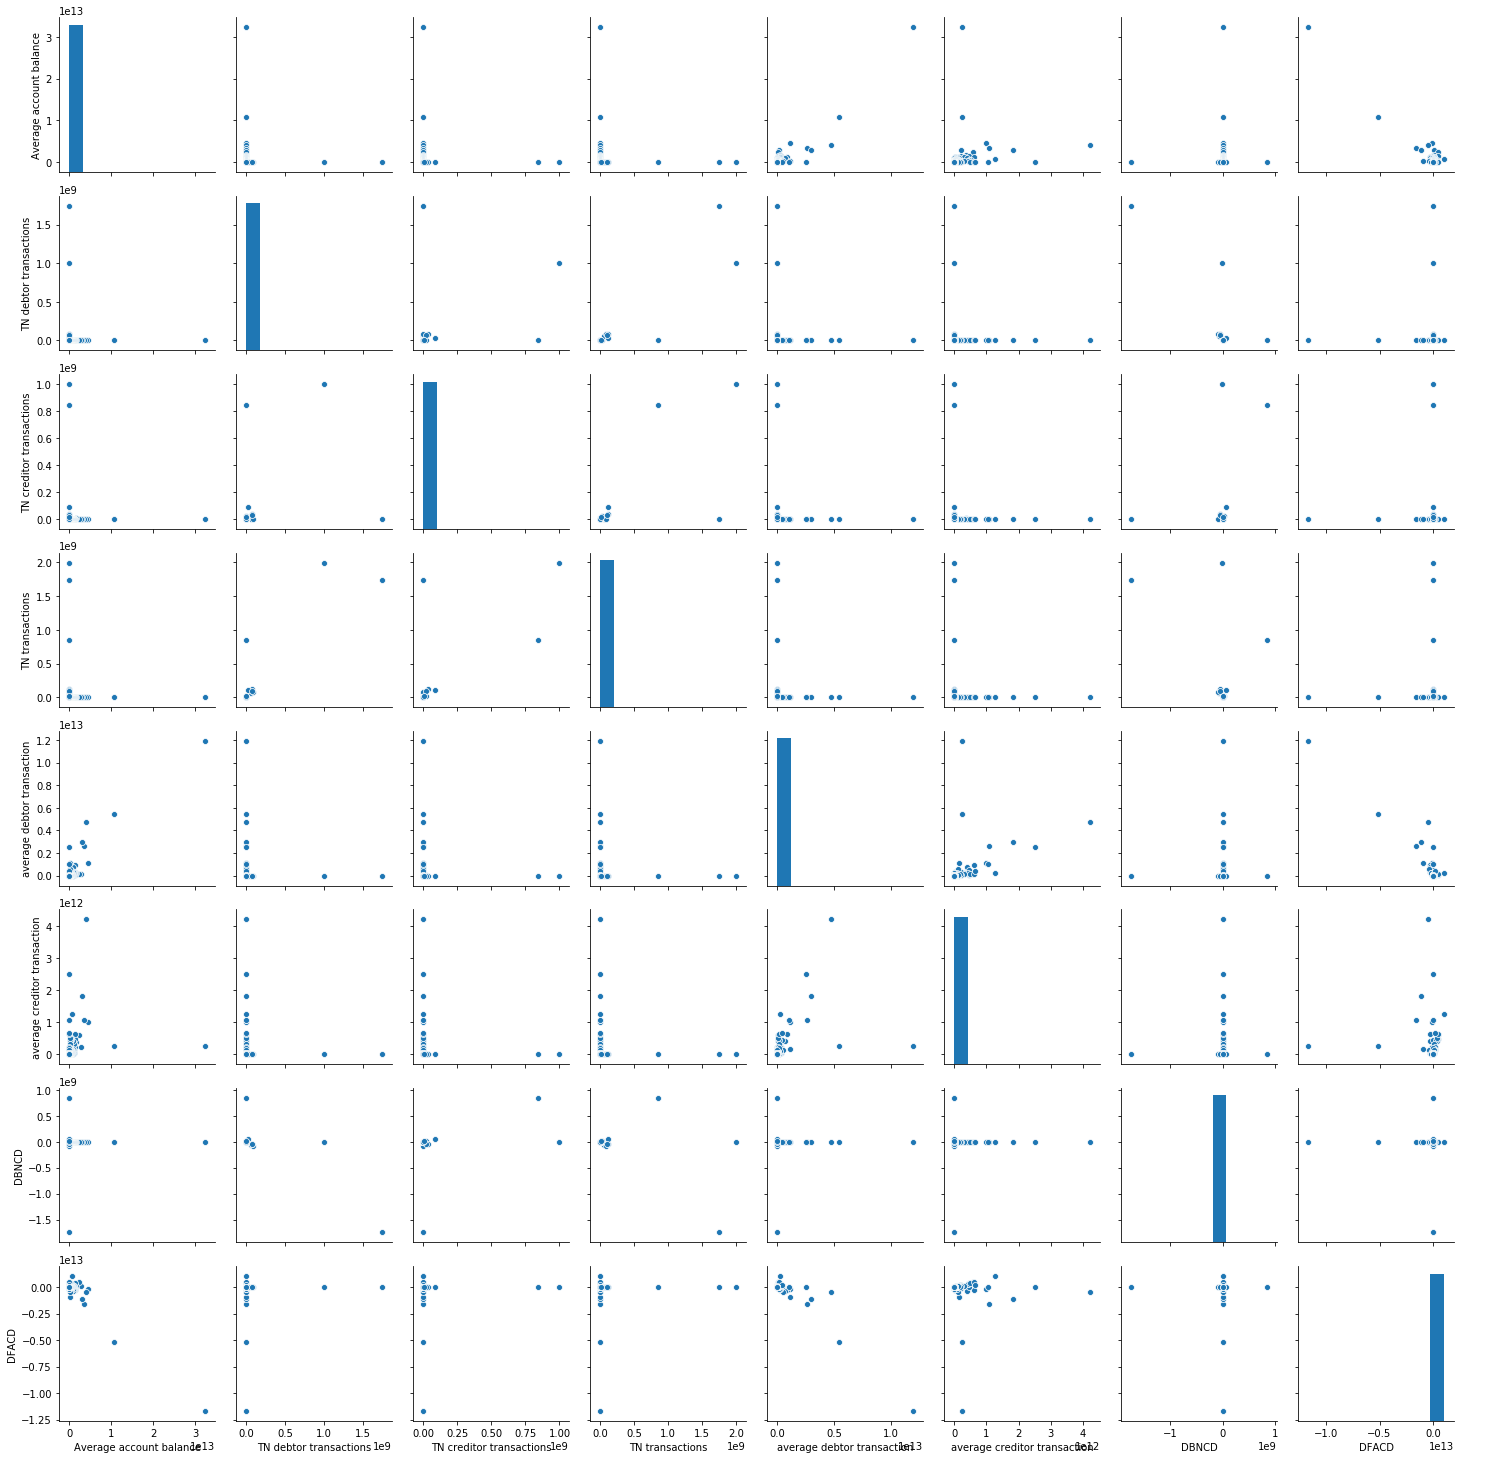

In [58]:
plt.figure(dpi=100)
sb.pairplot(bank)

###### Data normalizationdat 

In [59]:
bank_norm=normalize(bank)

In [60]:
bank_norm=pd.DataFrame(bank_norm,columns=bank.columns)

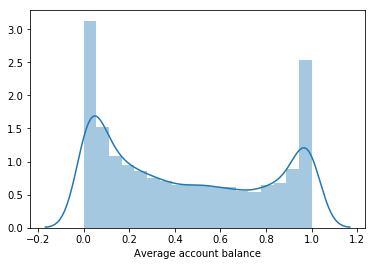

In [61]:
sb.distplot(bank_norm["Average account balance"])

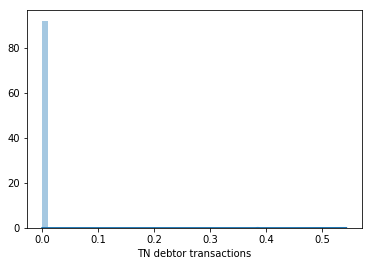

In [62]:
sb.distplot(bank_norm['TN debtor transactions'])

In [63]:
bank_sc=sc.fit_transform(bank)

In [64]:
bank_sc[0]

array([ 1.06354909e+02, -1.29922107e-02, -1.08496857e-02, -1.44795149e-02,
        9.31708371e+01,  4.62534188e+00,  6.16386090e-03, -1.04066926e+02])

In [65]:
bank_sc=pd.DataFrame(bank_sc,columns=bank.columns)

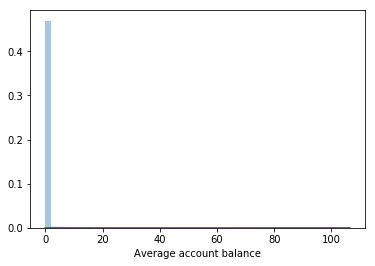

In [66]:
sb.distplot(bank_sc["Average account balance"])

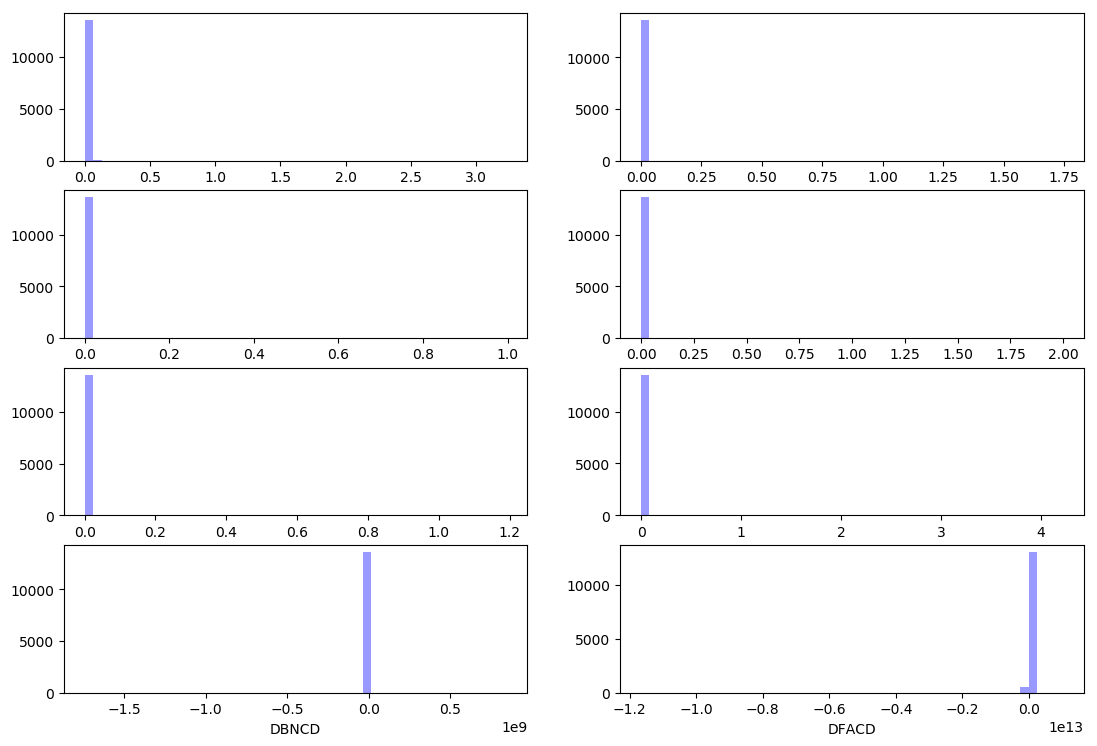

In [67]:
fig,axes=plt.subplots(4,2)
fig.dpi=100
fig.figsize=(11,5)


sb.distplot(bank["Average account balance"], kde=False, color="b", ax=axes[0,0])
sb.distplot(bank['TN debtor transactions'], kde=False, color="b", ax=axes[0,1])
sb.distplot(bank['TN creditor transactions'], kde=False, color="b", ax=axes[1,0])
sb.distplot(bank['TN transactions'], kde=False, color="b", ax=axes[1,1])
sb.distplot(bank['average debtor transaction'], kde=False, color="b", ax=axes[2,0])
sb.distplot(bank['average creditor transaction'], kde=False, color="b", ax=axes[2,1])
sb.distplot(bank['DBNCD'], kde=False, color="b", ax=axes[3,0])
sb.distplot(bank['DFACD'], kde=False, color="b", ax=axes[3,1])

plt.savefig("D:\\bank.png")
plt.subplots_adjust(3,3,4.7,4.7)
#motasefane alan balad nistam ino ba for benvisam :)

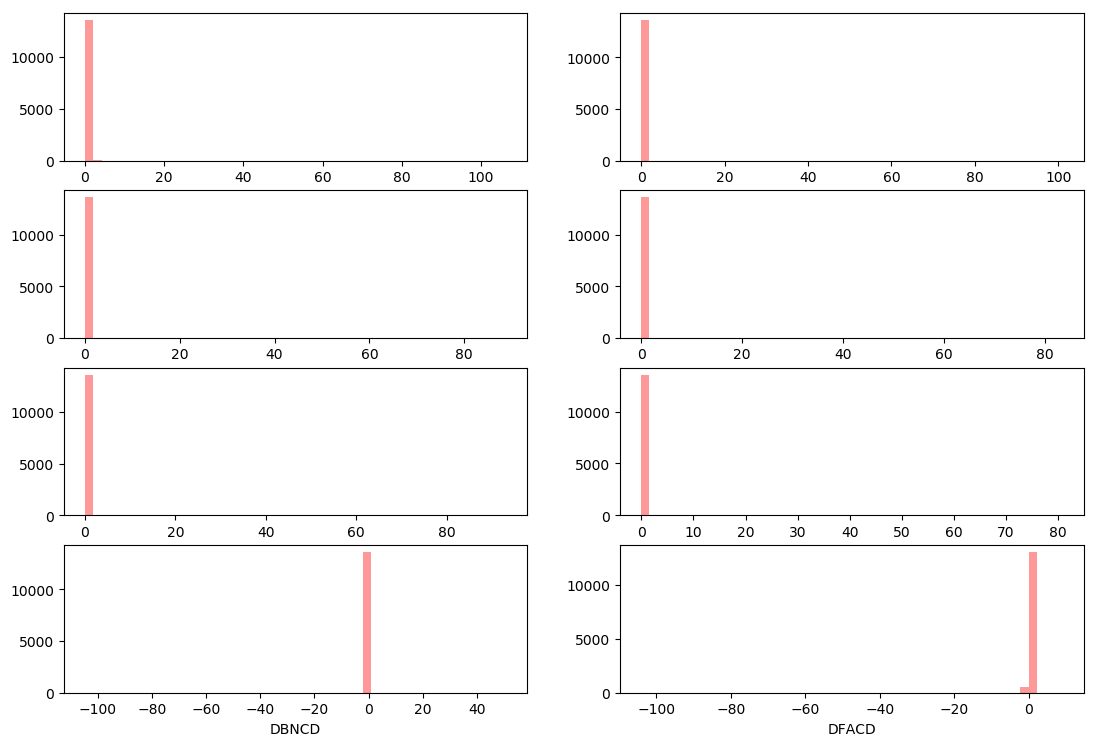

In [68]:
fig,axes=plt.subplots(4,2)
fig.dpi=100
fig.figsize=(11,5)


sb.distplot(bank_sc["Average account balance"], kde=False, color="r", ax=axes[0,0])
sb.distplot(bank_sc['TN debtor transactions'], kde=False, color="r", ax=axes[0,1])
sb.distplot(bank_sc['TN creditor transactions'], kde=False, color="r", ax=axes[1,0])
sb.distplot(bank_sc['TN transactions'], kde=False, color="r", ax=axes[1,1])
sb.distplot(bank_sc['average debtor transaction'], kde=False, color="r", ax=axes[2,0])
sb.distplot(bank_sc['average creditor transaction'], kde=False, color="r", ax=axes[2,1])
sb.distplot(bank_sc['DBNCD'], kde=False, color="r", ax=axes[3,0])
sb.distplot(bank_sc['DFACD'], kde=False, color="r", ax=axes[3,1])

plt.savefig("D:\\standard_bank.png")
plt.subplots_adjust(3,3,4.7,4.7)

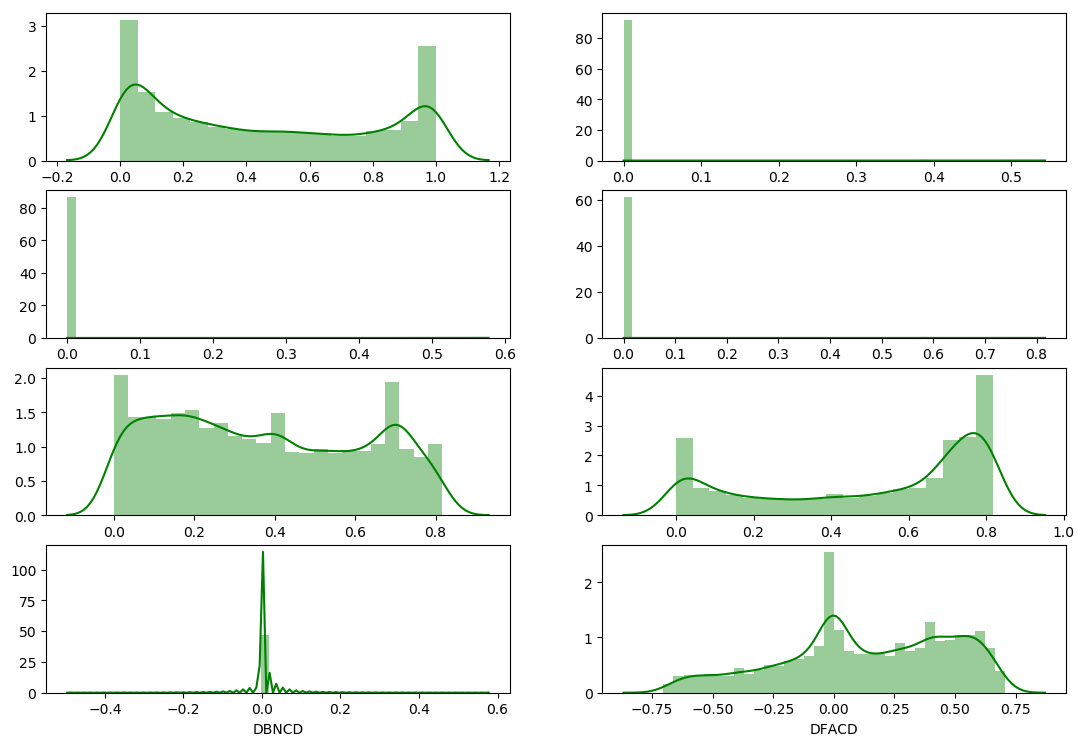

In [69]:
fig,axes=plt.subplots(4,2)
fig.dpi=100
fig.figsize=(11,5)


sb.distplot(bank_norm["Average account balance"],color="g", ax=axes[0,0])
sb.distplot(bank_norm['TN debtor transactions'],color="g", ax=axes[0,1])
sb.distplot(bank_norm['TN creditor transactions'],color="g", ax=axes[1,0])
sb.distplot(bank_norm['TN transactions'],color="g", ax=axes[1,1])
sb.distplot(bank_norm['average debtor transaction'],color="g", ax=axes[2,0])
sb.distplot(bank_norm['average creditor transaction'],color="g", ax=axes[2,1])
sb.distplot(bank_norm['DBNCD'], color="g", ax=axes[3,0])
sb.distplot(bank_norm['DFACD'], color="g", ax=axes[3,1])

plt.savefig("D:\\norm_bank.png")

plt.subplots_adjust(3,3,4.7,4.7)

##### clustring bank_norm

In [70]:
data_one=bank_norm.drop(['TN debtor transactions','TN creditor transactions'
                         ,'TN transactions','average debtor transaction'
                         ,"DFACD","DBNCD"
                        ],axis=1)
data_two=bank_norm.drop(['TN debtor transactions','TN creditor transactions'
                         ,'TN transactions','average debtor transaction'],axis=1)

In [71]:
inertia_list=list()
for k in range(1,15):
    kmn=KMeans(n_clusters=k)
    kmn.fit(bank_norm)
    inertia_list.append(kmn.inertia_)
   

In [72]:
inertia_list_1=list()
for k in range(1,15):
    kmn=KMeans(n_clusters=k)
    kmn.fit(data_one)
    inertia_list_1.append(kmn.inertia_)

In [73]:
inertia_list_2=list()
for k in range(1,15):
    kmn=KMeans(n_clusters=k)
    kmn.fit(data_two)
    inertia_list_2.append(kmn.inertia_)

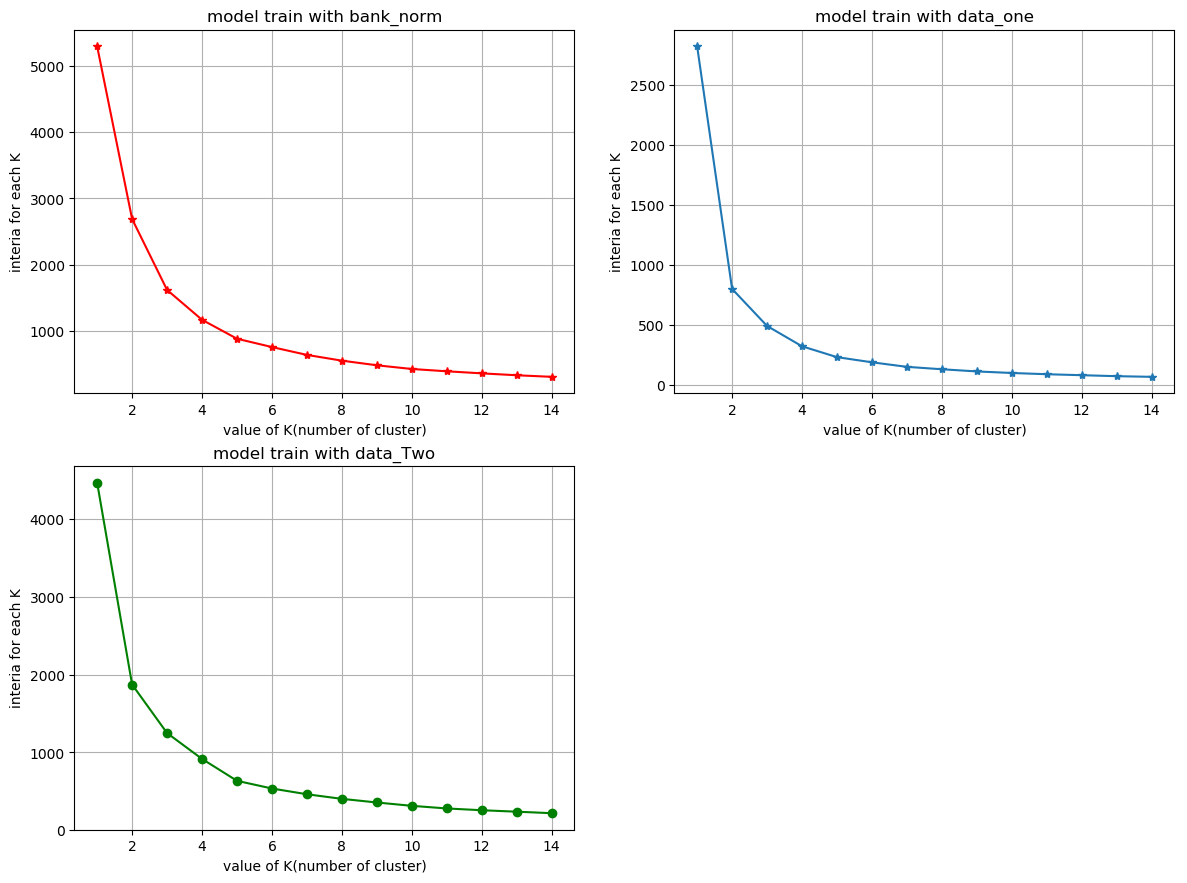

In [74]:
plt.figure(figsize=(11,4),dpi=100)
plt.subplot(221)
plt.plot(range(1,15),inertia_list,"*-",color="r",)
plt.title("model train with bank_norm")
plt.xlabel("value of K(number of cluster)")
plt.ylabel("interia for each K")
plt.grid()

plt.subplot(222)
plt.plot(range(1,15),inertia_list_1,"*-")
plt.title("model train with data_one")
plt.xlabel("value of K(number of cluster)")
plt.ylabel("interia for each K")
plt.grid()

plt.subplot(223)
plt.plot(range(1,15),inertia_list_2,"o-",color='g')
plt.title("model train with data_Two")
plt.xlabel("value of K(number of cluster)")
plt.ylabel("interia for each K")
plt.grid()



plt.subplots_adjust(3.5,2.5,4.5,4.5)

In [75]:
score_list=list()    
for k in range(2,15):
    kmn=KMeans(n_clusters=k)
    labels=kmn.fit_predict(bank_norm)
    score=silhouette_score(bank_norm,labels,metric='euclidean',sample_size=5000)
    score_list.append(score)

In [76]:
score_list_1=list()    
for k in range(2,15):
    kmn=KMeans(n_clusters=k)
    labels=kmn.fit_predict(data_one)
    score=silhouette_score(data_one,labels,metric='euclidean',sample_size=5000)
    score_list_1.append(score)

In [77]:
score_list_2=list()    
for k in range(2,15):
    kmn=KMeans(n_clusters=k)
    labels=kmn.fit_predict(data_two)
    score=silhouette_score(data_two,labels,metric='euclidean',sample_size=5000)
    score_list_2.append(score)

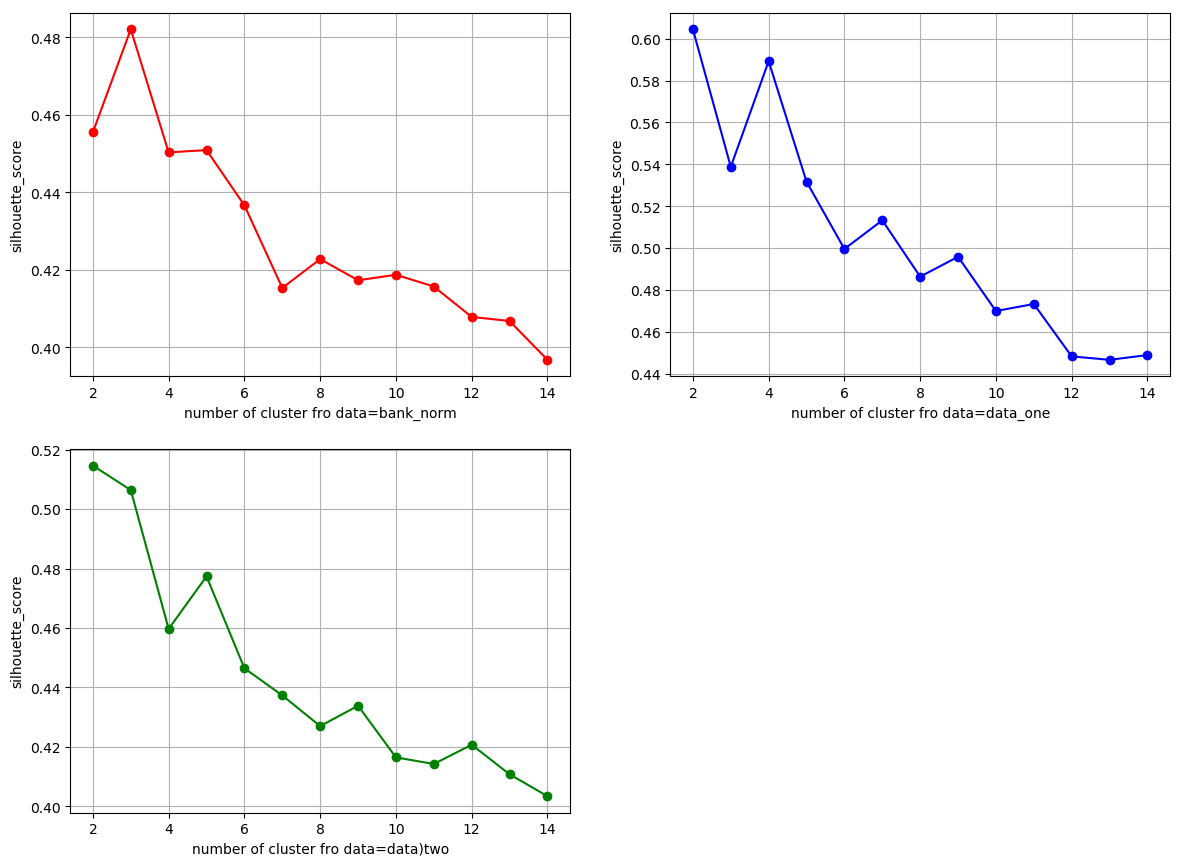

In [78]:
#score=silhouette_score(data_one,kmn.labels_,metric='euclidean',sample_size=5000)
plt.figure(figsize=(11,4),dpi=100)
plt.subplot(221)
plt.plot(range(2,15),score_list,"o-",color="r")
plt.xlabel("number of cluster fro data=bank_norm")
plt.ylabel("silhouette_score")
plt.grid()
plt.subplot(222)
plt.plot(range(2,15),score_list_1,"o-",color="b")
plt.xlabel("number of cluster fro data=data_one")
plt.ylabel("silhouette_score")
plt.grid()
plt.subplot(223)
plt.plot(range(2,15),score_list_2,"o-",color="g")
plt.xlabel("number of cluster fro data=data)two")
plt.ylabel("silhouette_score")
plt.grid()


plt.subplots_adjust(3.5,2.5,4.5,4.5)

#####  We use this bank_norm for clustering  

In [79]:
kmn=KMeans(n_clusters=3,random_state=42)
label=kmn.fit_predict(bank_norm)
centers = kmn.cluster_centers_

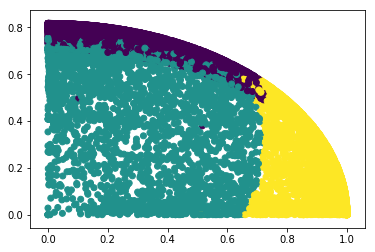

In [80]:
plt.scatter(bank_norm['Average account balance'],bank_norm["average creditor transaction"],c=label)


In [81]:
label

array([2, 2, 2, ..., 1, 1, 1])

In [82]:
bank_norm["Label"]=label

In [83]:
bank_norm["Label"].value_counts()

0    5935
2    4154
1    3550
Name: Label, dtype: int64

In [84]:
bank_norm["Label"].value_counts(normalize)*100

0    43.514920
2    30.456778
1    26.028301
Name: Label, dtype: float64

In [85]:
bank_norm["Label"].unique()

array([2, 1, 0], dtype=int64)

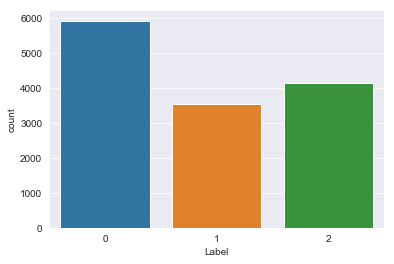

In [86]:
sb.set_style("darkgrid")
sb.countplot("Label",data=bank_norm)

In [87]:
bank_norm.head(5)

Average account balance  TN debtor transactions  TN creditor transactions  \
0                 0.888613            2.823709e-11              7.496866e-10   
1                 0.819328            4.558327e-11              1.185624e-09   
2                 0.948651            2.276487e-12              2.069534e-13   
3                 0.544428            2.606154e-10              5.940497e-10   
4                 0.726898            3.599195e-12              1.270304e-11   

   TN transactions  average debtor transaction  average creditor transaction  \
0     7.779237e-10                    0.327629                      0.006724   
1     1.231207e-09                    0.414097                      0.017987   
2     2.483440e-12                    0.237297                      0.206953   
3     8.546651e-10                    0.623510                      0.557165   
4     1.630223e-11                    0.557522                      0.226929   

          DBNCD     DFACD  Label  
0  7.214495e-10 -0.320905      2  
1  1.140041e-09 -0.396109      2  
2 -2.069534e-12 -0.030344      2  
3  3.334344e-10 -0.066345      1  
4  9.103845e-12 -0.330593      2

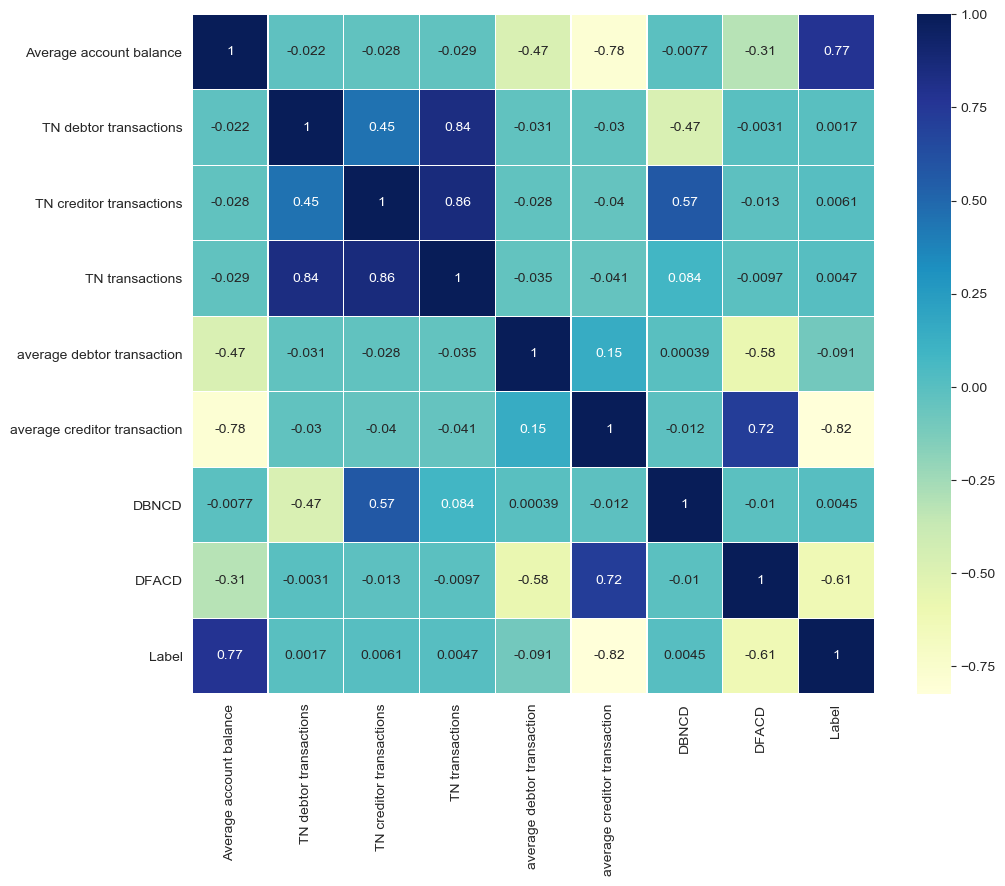

In [88]:
plt.figure(figsize=(11,9),dpi=100)
sb.heatmap(bank_norm.corr(),annot=True,lw=0.2,cmap="YlGnBu")

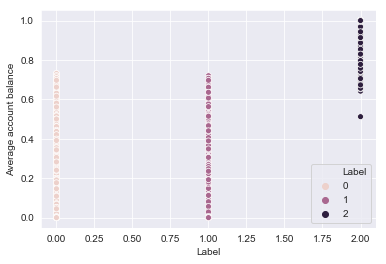

In [89]:
sb.scatterplot("Label",'Average account balance',hue="Label",data=bank_norm)

### scatter plot for features that are most correlated to the label

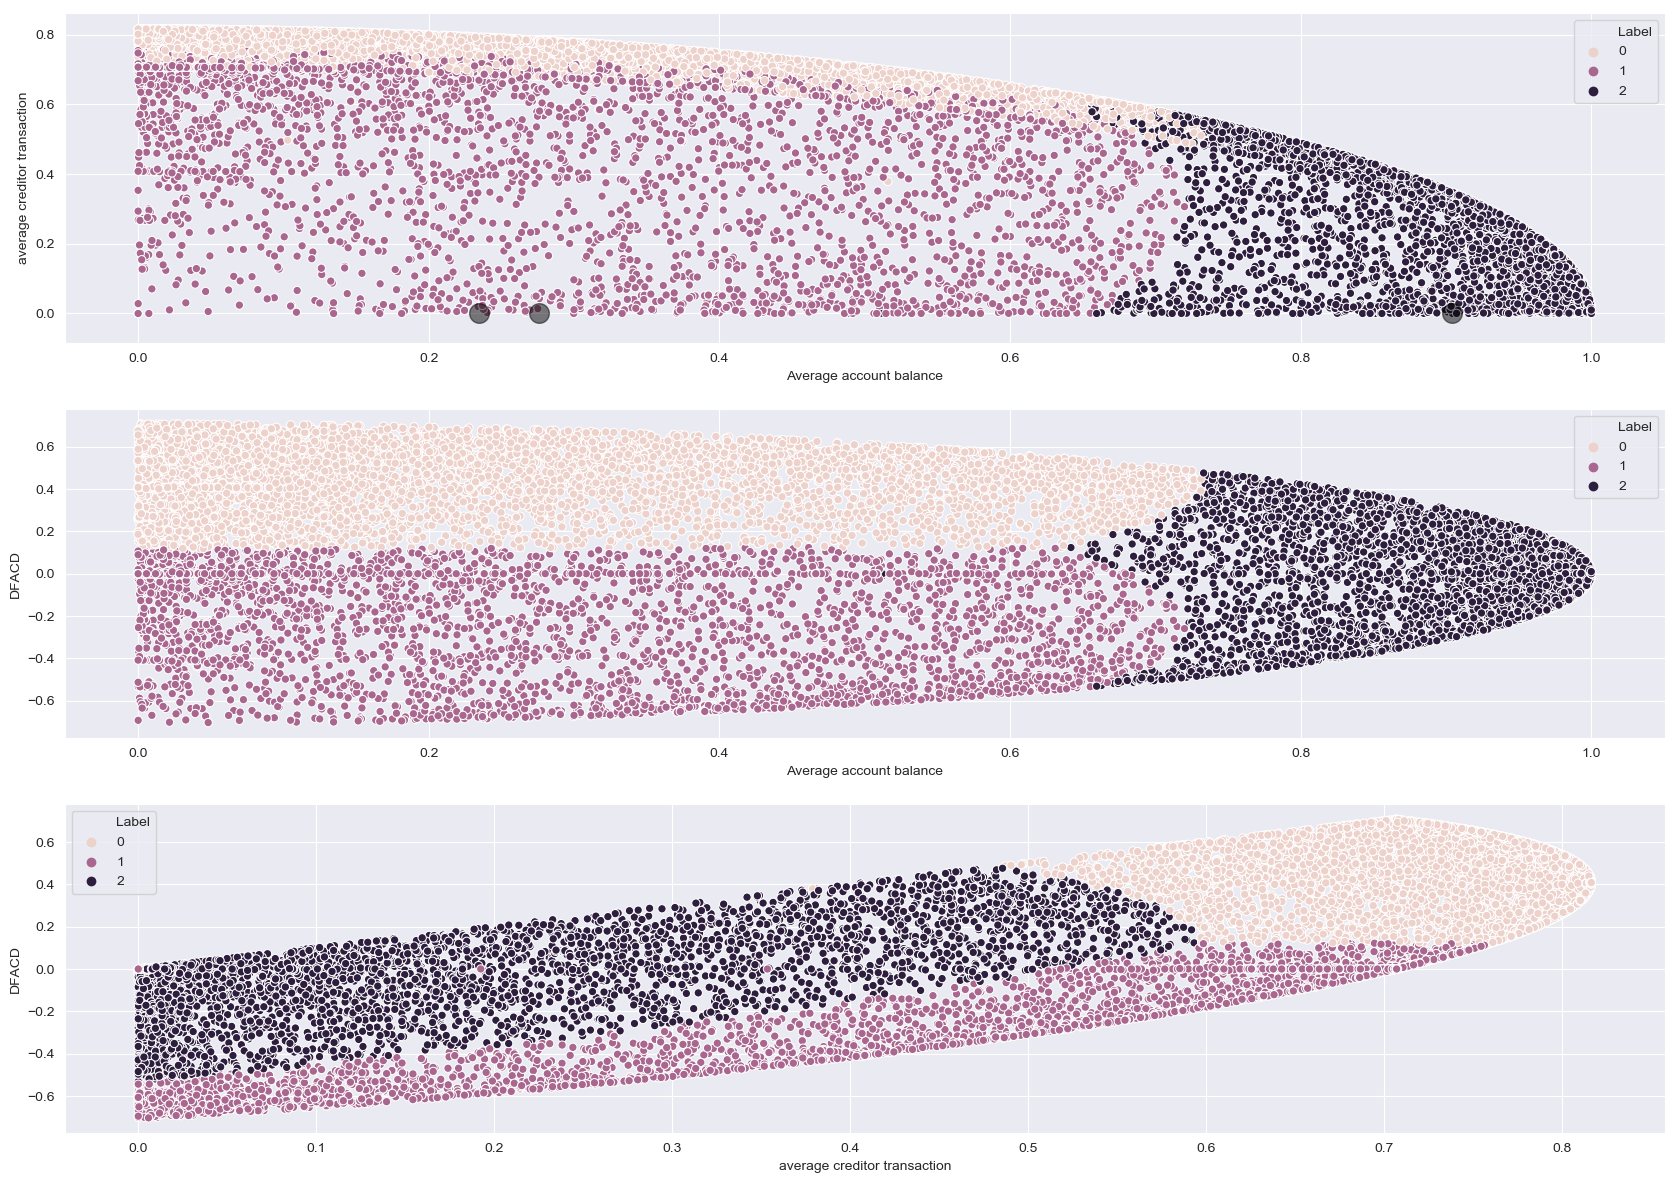

In [103]:
plt.figure(figsize=(10,7),dpi=100)

plt.subplot(311)
sb.scatterplot('Average account balance',"average creditor transaction",hue="Label",data=bank_norm)

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.subplot(312)
sb.scatterplot('Average account balance','DFACD',hue="Label",data=bank_norm)

plt.subplot(313)
sb.scatterplot('average creditor transaction','DFACD',hue="Label",data=bank_norm)

plt.subplots_adjust(3.4,3.4,5,5)

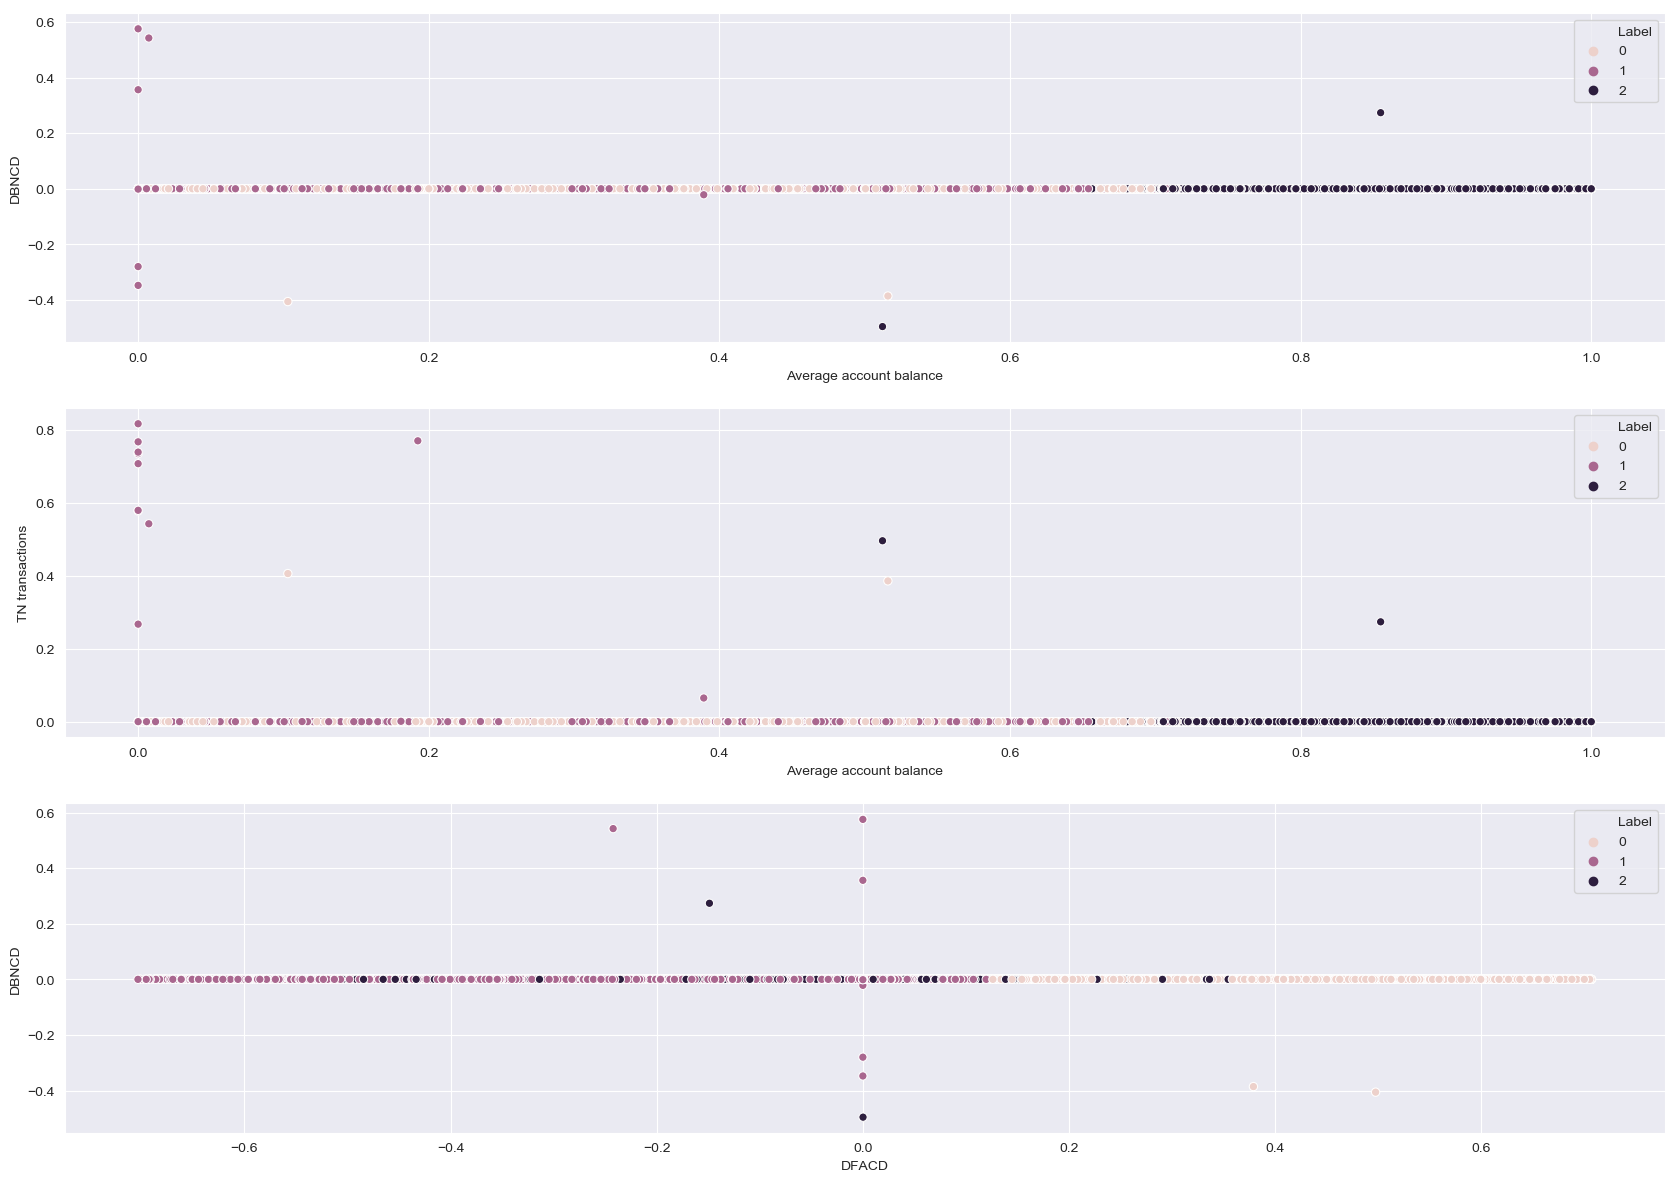

In [104]:
plt.figure(figsize=(10,7),dpi=100)

plt.subplot(311)
sb.scatterplot('Average account balance','DBNCD',hue="Label",data=bank_norm)

plt.subplot(312)
sb.scatterplot('Average account balance','TN transactions',hue="Label",data=bank_norm)

plt.subplot(313)
sb.scatterplot('DFACD','DBNCD',hue='Label',data=bank_norm)


plt.subplots_adjust(3.4,3.4,5,5)

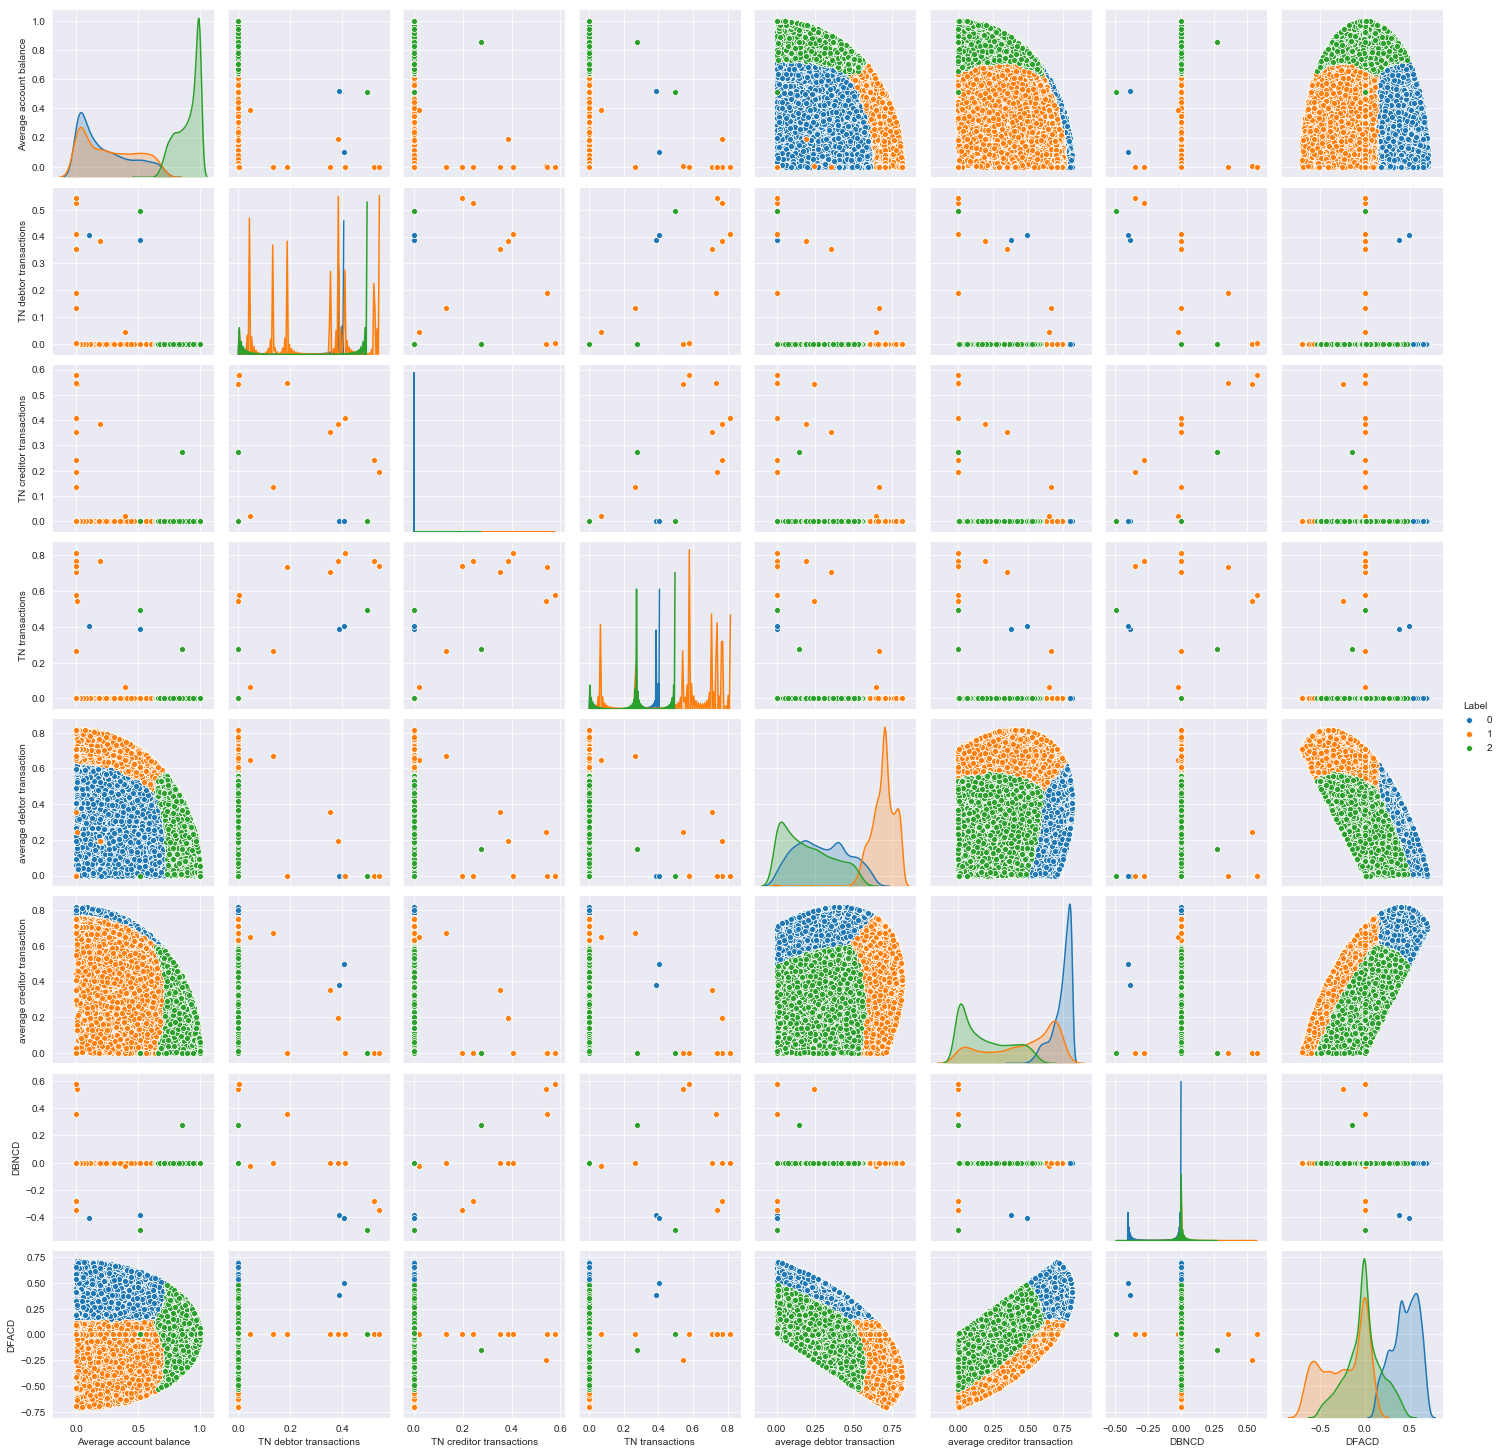

In [228]:
sb.pairplot(bank_norm,hue="Label")

In [105]:
bank_norm[bank_norm["Label"]==0].head()

Average account balance  TN debtor transactions  TN creditor transactions  \
21                 0.431216            3.796313e-11              1.760609e-11   
29                 0.608918            1.438056e-09              1.940331e-10   
63                 0.351854            1.239555e-09              4.620000e-10   
65                 0.344129            4.468503e-10              2.859157e-10   
66                 0.561403            2.342492e-10              1.156786e-11   

    TN transactions  average debtor transaction  average creditor transaction  \
21     5.556922e-11                    0.138550                      0.695876   
29     1.632089e-09                    0.186234                      0.630329   
63     1.701555e-09                    0.187793                      0.735496   
65     7.327660e-10                    0.324706                      0.763778   
66     2.458170e-10                    0.036359                      0.602493   

           DBNCD     DFACD  Label  
21 -2.035704e-11  0.557326      0  
29 -1.244022e-09  0.444096      0  
63 -7.775548e-10  0.547703      0  
65 -1.609346e-10  0.439072      0  
66 -2.226813e-10  0.566134      0

In [106]:
bank_norm.groupby("Label").agg({"mean"})

Average account balance TN debtor transactions TN creditor transactions  \
                         mean                   mean                     mean   
Label                                                                           
0                    0.234890               0.000134             1.935404e-07   
1                    0.275738               0.000728             1.123172e-03   
2                    0.904249               0.000120             6.697628e-05   

      TN transactions average debtor transaction average creditor transaction  \
                 mean                       mean                         mean   
Label                                                                           
0            0.000134                   0.297658                     0.746528   
1            0.001851                   0.695029                     0.462652   
2            0.000187                   0.203908                     0.192444   

          DBNCD     DFACD  
           mean      mean  
Label                      
0     -0.000134  0.448871  
1      0.000395 -0.232377  
2     -0.000053 -0.011464

In [107]:
bank_norm.groupby("Label").agg({"min"})

Average account balance TN debtor transactions TN creditor transactions  \
                          min                    min                      min   
Label                                                                           
0                    0.000000           5.267421e-12             8.464342e-12   
1                    0.000000           0.000000e+00             2.828414e-13   
2                    0.512193           0.000000e+00             0.000000e+00   

      TN transactions average debtor transaction average creditor transaction  \
                  min                        min                          min   
Label                                                                           
0        2.297464e-11                        0.0                 3.789659e-01   
1        5.656827e-13                        0.0                 6.228978e-09   
2        0.000000e+00                        0.0                 2.686678e-11   

          DBNCD     DFACD  
            min       min  
Label                      
0     -0.405936  0.116712  
1     -0.347671 -0.703387  
2     -0.495869 -0.531514

In [108]:
bank_norm.groupby("Label").agg({"max"})

Average account balance TN debtor transactions TN creditor transactions  \
                          max                    max                      max   
Label                                                                           
0                    0.731331               0.405936                 0.000078   
1                    0.719989               0.543224                 0.577350   
2                    1.000000               0.495869                 0.273677   

      TN transactions average debtor transaction average creditor transaction  \
                  max                        max                          max   
Label                                                                           
0            0.405936                   0.641380                     0.816497   
1            0.816496                   0.816497                     0.756799   
2            0.495869                   0.566241                     0.593326   

          DBNCD     DFACD  
            max       max  
Label                      
0      0.000010  0.707105  
1      0.577350  0.123551  
2      0.273677  0.475949

In [109]:
bank_norm.groupby("Label").agg({"std"})

Average account balance TN debtor transactions TN creditor transactions  \
                          std                    std                      std   
Label                                                                           
0                    0.208768               0.007269                 0.000001   
1                    0.217463               0.017308                 0.022577   
2                    0.092439               0.007694                 0.004246   

      TN transactions average debtor transaction average creditor transaction  \
                  std                        std                          std   
Label                                                                           
0            0.007269                   0.166397                     0.067507   
1            0.035448                   0.076593                     0.240096   
2            0.008787                   0.160134                     0.175313   

          DBNCD     DFACD  
            std       std  
Label                      
0      0.007269  0.146512  
1      0.019027  0.244272  
2      0.008789  0.196112

In [110]:
bank_norm.groupby("Label")["Average account balance","DFACD","average creditor transaction"].max()

Average account balance     DFACD  average creditor transaction
Label                                                                 
0                     0.731331  0.707105                      0.816497
1                     0.719989  0.123551                      0.756799
2                     1.000000  0.475949                      0.593326

In [111]:
bank_norm.groupby("Label")["Average account balance","DFACD","average creditor transaction"].min()

Average account balance     DFACD  average creditor transaction
Label                                                                 
0                     0.000000  0.116712                  3.789659e-01
1                     0.000000 -0.703387                  6.228978e-09
2                     0.512193 -0.531514                  2.686678e-11

In [112]:
bank_norm.groupby("Label")["Average account balance","DFACD","average creditor transaction"].mean()

Average account balance     DFACD  average creditor transaction
Label                                                                 
0                     0.234890  0.448871                      0.746528
1                     0.275738 -0.232377                      0.462652
2                     0.904249 -0.011464                      0.192444

#  Equivalent to Kmeans clusters
###  0:Bad account
###  1:Normal account
###  2:good  account

#### denoising with DBSCAN

In [114]:
db=DBSCAN(eps=0.7,min_samples=9)

In [115]:
db.fit(bank_norm)

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=9, n_jobs=None, p=None)

In [116]:
db_labels=db.labels_

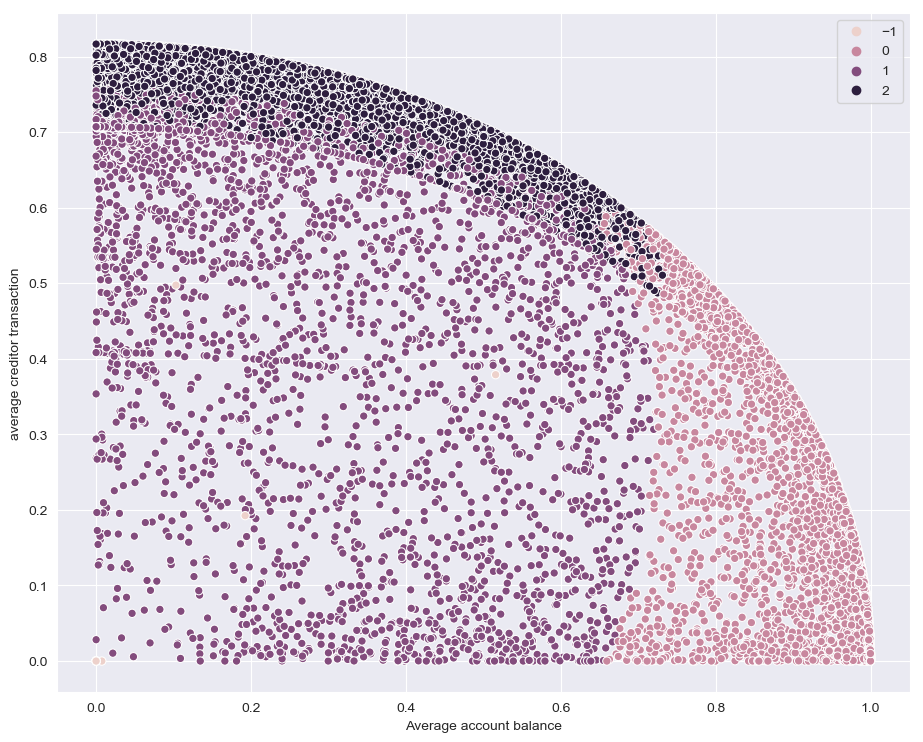

In [117]:
plt.figure(figsize=(11,9),dpi=100)
sb.scatterplot('Average account balance','average creditor transaction',hue=db_labels,data=bank_norm)
plt.savefig("D:\\a.png")

In [118]:
pd.Series(db_labels).unique()   # -1 noise values

array([ 0,  1,  2, -1], dtype=int64)

In [119]:
pd.Series(db_labels).value_counts() #11 noise in data

 2    5933
 0    4153
 1    3542
-1      11
dtype: int64

In [120]:
bank_norm_db=bank_norm.drop("Label",axis=1)
bank_norm_db["Label_db"]=db_labels


In [121]:
bank_norm_db[bank_norm_db["Label_db"]==-1].index

Int64Index([1672, 7232, 9081, 10048, 13608, 13633, 13634, 13635, 13636, 13637,
            13638],
           dtype='int64')

In [122]:
##drop nois row
bank_norm_db.drop([1672, 7232, 9081, 10048, 13608, 13633, 13634, 13635, 13636, 13637,13638],axis=0, inplace=True)

In [123]:
bank_norm_db[bank_norm_db["Label_db"]==-1].index

Int64Index([], dtype='int64')

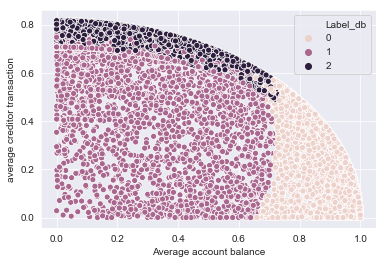

In [124]:
sb.scatterplot('Average account balance','average creditor transaction',hue="Label_db",data=bank_norm_db)

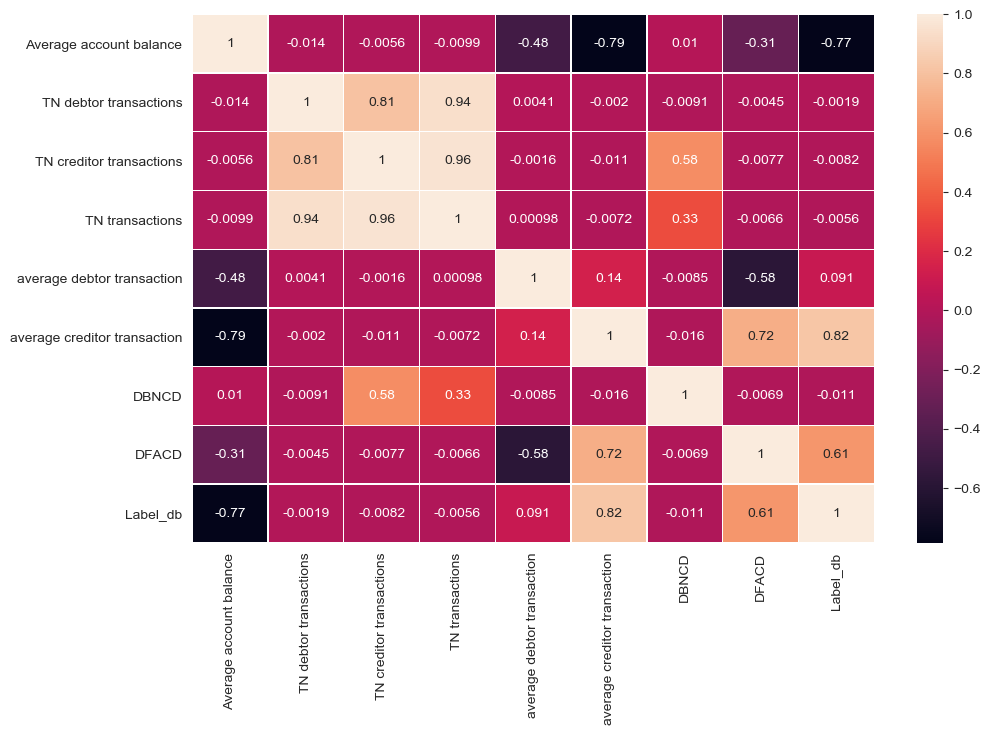

In [125]:
plt.figure(figsize=(11,7),dpi=100)
sb.heatmap(bank_norm_db.corr(),annot=True,lw=0.2)

In [126]:
bank_norm_db.groupby("Label_db").agg({'mean'})

Average account balance TN debtor transactions  \
                            mean                   mean   
Label_db                                                  
0                       0.904343           6.793854e-07   
1                       0.276305           1.505037e-04   
2                       0.234865           5.367514e-07   

         TN creditor transactions TN transactions average debtor transaction  \
                             mean            mean                       mean   
Label_db                                                                       
0                    6.699240e-05    6.767179e-05                   0.203957   
1                    1.448924e-04    2.953961e-04                   0.696476   
2                    1.935790e-07    7.303304e-07                   0.297758   

         average creditor transaction         DBNCD     DFACD  
                                 mean          mean      mean  
Label_db                                                       
0                            0.192490  6.631302e-05 -0.011467  
1                            0.463643 -5.611269e-06 -0.232833  
2                            0.746632 -3.431723e-07  0.448874

In [127]:
bank_norm_db.groupby("Label_db").agg({'min'})

Average account balance TN debtor transactions  \
                             min                    min   
Label_db                                                  
0                       0.641871           0.000000e+00   
1                       0.000000           2.828414e-13   
2                       0.000000           5.267421e-12   

         TN creditor transactions TN transactions average debtor transaction  \
                              min             min                        min   
Label_db                                                                       
0                    0.000000e+00    0.000000e+00               0.000000e+00   
1                    2.828414e-13    5.656827e-13               3.535534e-01   
2                    8.464342e-12    2.297464e-11               6.320905e-08   

         average creditor transaction     DBNCD     DFACD  
                                  min       min       min  
Label_db                                                   
0                        2.686678e-11 -0.000077 -0.531514  
1                        6.228978e-09 -0.021622 -0.703387  
2                        4.871717e-01 -0.000134  0.116712

In [128]:
bank_norm_db.groupby("Label_db").agg({"max"})

Average account balance TN debtor transactions  \
                             max                    max   
Label_db                                                  
0                       1.000000               0.000154   
1                       0.719989               0.353553   
2                       0.731331               0.000151   

         TN creditor transactions TN transactions average debtor transaction  \
                              max             max                        max   
Label_db                                                                       
0                        0.273677        0.273677                   0.566241   
1                        0.353553        0.707107                   0.816497   
2                        0.000078        0.000175                   0.641380   

         average creditor transaction     DBNCD     DFACD  
                                  max       max       max  
Label_db                                                   
0                            0.593326  0.273677  0.475949  
1                            0.756799  0.000235  0.123551  
2                            0.816497  0.000010  0.707105

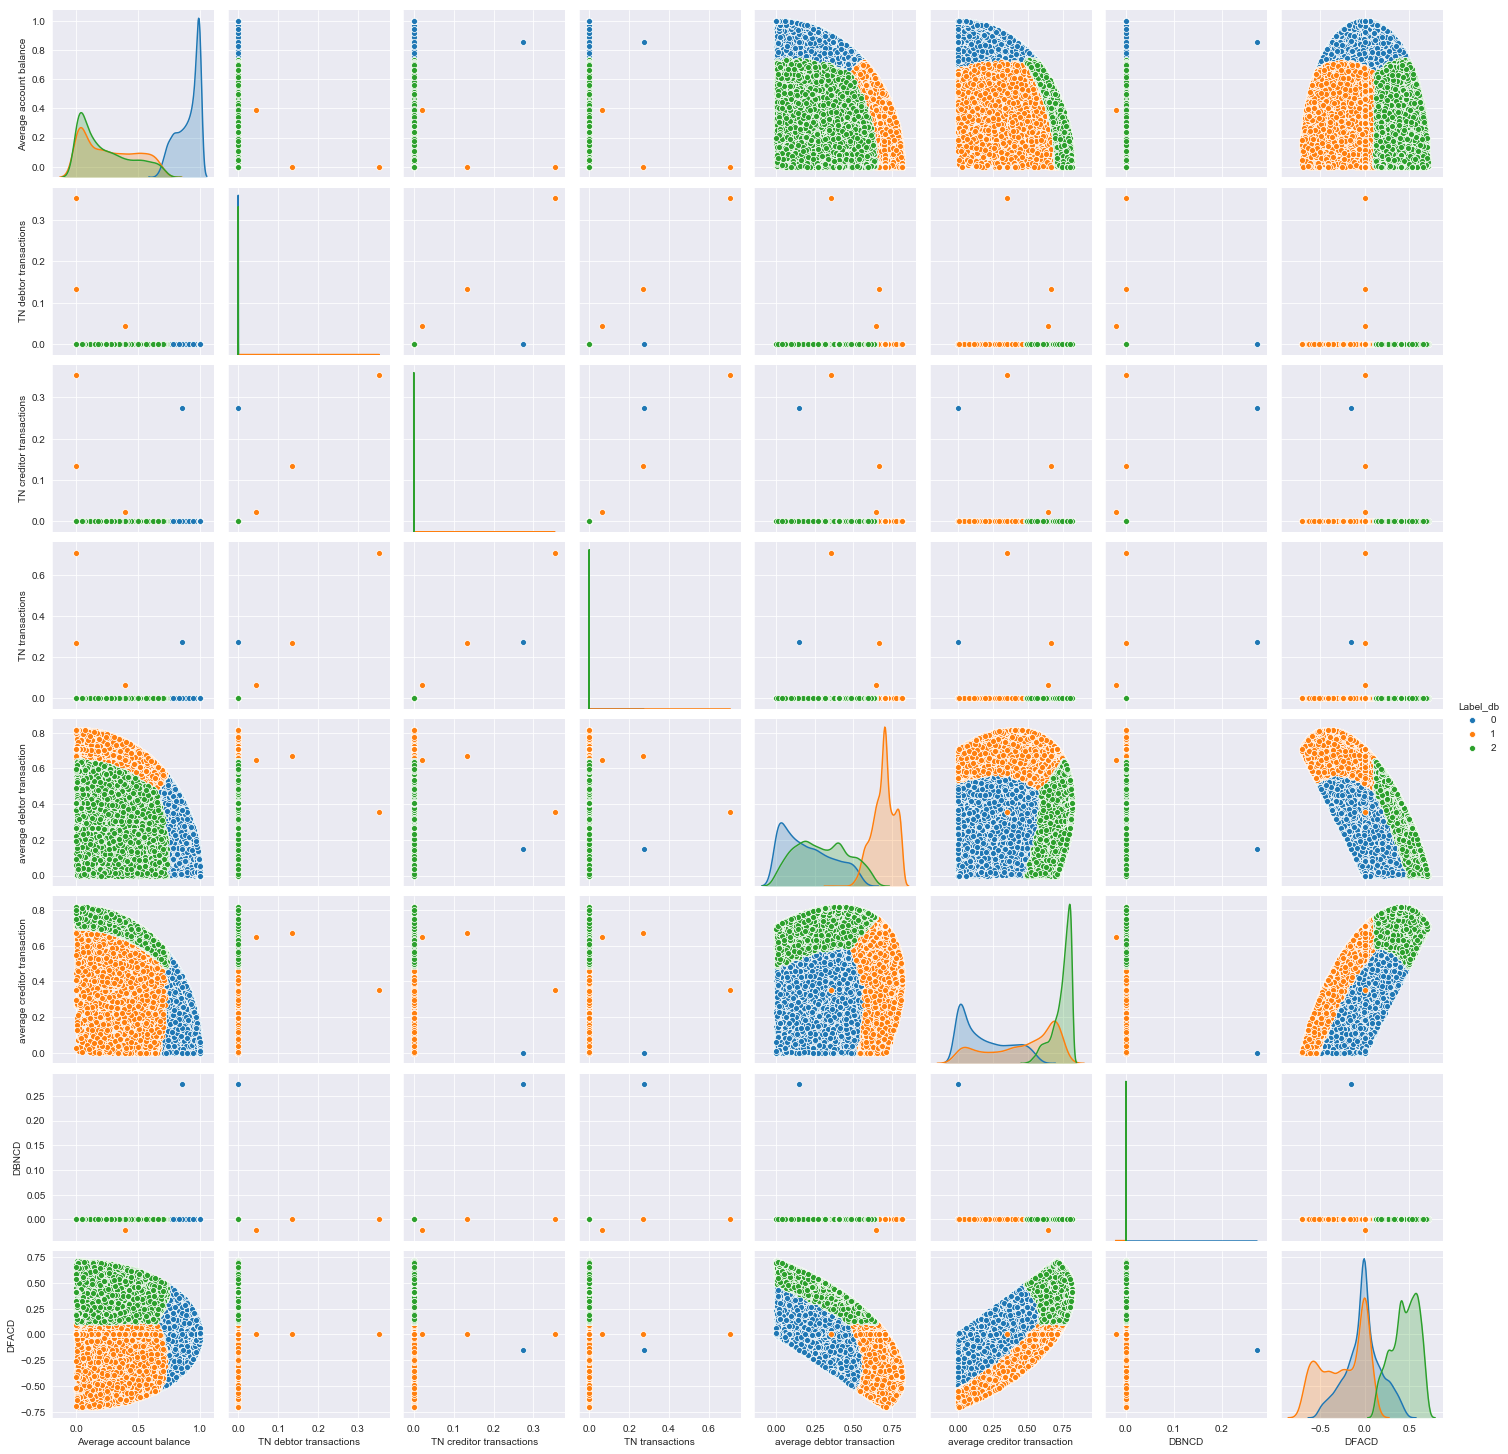

In [229]:
sb.pairplot(bank_norm_db,hue="Label_db")

#  Equivalent to  DBSCAN clusters

###  0: good account

###  1: Normal account

###  2: bad  account

In [166]:
mn=MeanShift(bandwidth=0.5,bin_seeding=True)

In [167]:
mn.fit(bank_norm.drop("Label",axis=1))

MeanShift(bandwidth=0.5, bin_seeding=True, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [168]:
labels_mn=mn.labels_

In [169]:
pd.Series(labels_mn).unique()

array([1, 2, 0, 5, 6, 4, 3], dtype=int64)

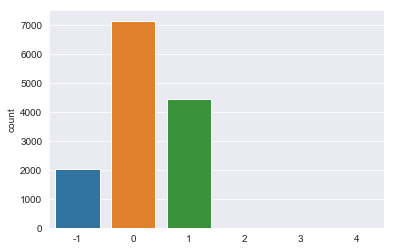

In [197]:
sb.countplot(labels_mn) #6 cluster dad ke mibinim bdarad nemikhore  

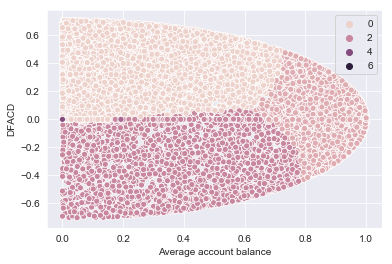

In [170]:
sb.scatterplot(bank_norm["Average account balance"],bank_norm["DFACD"],hue=labels_mn)

In [177]:
mn=MeanShift(bandwidth=0.6,cluster_all=False,bin_seeding=True)
#cluster_all==detection nois data
mn.fit(bank_norm.drop("Label",axis=1))
labels_mn=mn.labels_

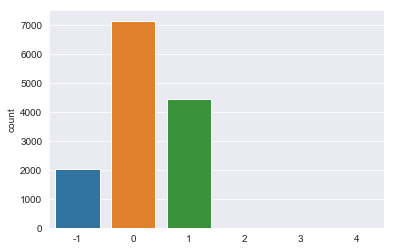

In [196]:
sb.countplot(labels_mn)
#detect 14% data is noise

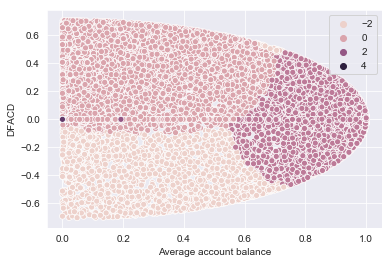

In [183]:
sb.scatterplot(bank_norm["Average account balance"],bank_norm["DFACD"],hue=labels_mn)

In [220]:
agc=AgglomerativeClustering(n_clusters=3,linkage="complete")

In [221]:
data_agc=bank_norm.drop("Label",axis=1).sample(frac=0.3,random_state=33)
# Because this algorithm does not work on big data, we only give 30% of the data to it

In [222]:
agc.fit(data_agc)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

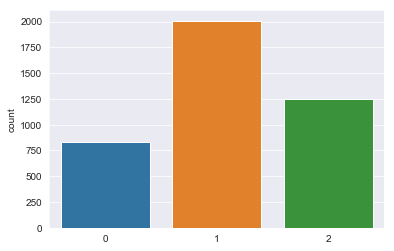

In [223]:
sb.countplot(agc.labels_)

In [226]:
lable_agc=agc.labels_
data_agc["label_agc"]=label_agc

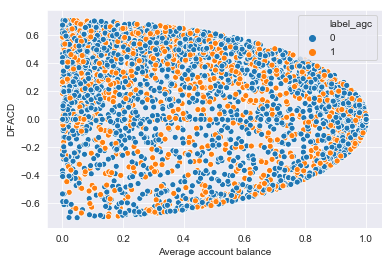

In [227]:
sb.scatterplot('Average account balance',"DFACD",hue="label_agc",data=data_agc)

###  save data set to csv file for clasification

In [ ]:
#bank_norm_db.to_csv(r"D://project/bank/bank_DBSCAN_label.csv")

# End 